In [ ]:
## Install and import packages
!pip install openmeteo-requests
!pip install requests-cache retry-requests

import pandas as pd
import os

## Access Google Drive for dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import seaborn as sns

In [ ]:
!pip install squarify

In [ ]:
pip install keras


In [ ]:
!pip install plotly_express


In [ ]:
pip install --upgrade tensorflow


In [ ]:
pip install sklearn-keras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation
from keras import optimizers
from keras.layers import TimeDistributed
from keras.layers import Flatten
from sklearn.metrics import accuracy_score
from keras.datasets import reuters
#from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D
from keras.preprocessing import sequence
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle       # this is added for the rectanfgular plot
from numpy import array
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input  # this will be used in the CNN model bulding, for example, Input is the first line of the model
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation, TimeDistributed, Flatten, LSTM, Dropout, Embedding, Bidirectional
from keras import optimizers
from keras.datasets import reuters, imdb
from keras.utils import to_categorical
from keras.preprocessing import sequence
from sklearn.metrics import accuracy_score

In [ ]:
# Special plot that makes the figure bigger
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

In [ ]:
tf.random.set_seed(123)
SEED = 1000

In [ ]:
path = '/content/drive/MyDrive/Colab Notebook/Colab Notebook/infodengue2024 /info dengue data and model'
## # Load the dengue data into a DataFrame which was downloaded and unzipped from https://info.dengue.mat.br/minio/browser/sprint202425/climate.csv.gz
file = 'dengue.csv'
# Creating DataFrame
df = pd.read_csv(os.path.join(path, file), low_memory=False)
# Creating DataFrame
df

date  year  epiweek  casos  geocode                 regional  \
0        2010-01-03  2010   201001      0  4208450                 Nordeste   
1        2010-01-03  2010   201001      0  4216206                 Nordeste   
2        2010-01-03  2010   201001      0  4218509               Meio Oeste   
3        2010-01-03  2010   201001      0  4216404  Extremo Sul Catarinense   
4        2010-01-03  2010   201001      0  4201307                 Nordeste   
...             ...   ...      ...    ...      ...                      ...   
4187428  2024-06-02  2024   202423      0  2902401                  Itabuna   
4187429  2024-06-02  2024   202423      0  2903409             Porto Seguro   
4187430  2024-06-02  2024   202423      0  2904753                Ibotirama   
4187431  2024-06-02  2024   202423      0  2906907      Teixeira de Freitas   
4187432  2024-06-02  2024   202423      0  2908903         Feira de Santana   

         regional_geocode                   macroregional  \
0                   42011       Planalto Norte e Nordeste   
1                   42011       Planalto Norte e Nordeste   
2                   42008  Meio Oeste e Serra Catarinense   
3                   42014                             Sul   
4                   42011       Planalto Norte e Nordeste   
...                   ...                             ...   
4187428             29012                             Sul   
4187429             29018                     Extremo Sul   
4187430             29008                           Oeste   
4187431             29026                     Extremo Sul   
4187432             29006                    Centro-Leste   

         macroregional_geocode  uf  train_1  train_2  target_1  target_2  
0                         4211  SC     True     True     False     False  
1                         4211  SC     True     True     False     False  
2                         4212  SC     True     True     False     False  
3                         4210  SC     True     True     False     False  
4                         4211  SC     True     True     False     False  
...                        ...  ..      ...      ...       ...       ...  
4187428                   2910  BA    False    False     False      True  
4187429                   2916  BA    False    False     False      True  
4187430                   2912  BA    False    False     False      True  
4187431                   2916  BA    False    False     False      True  
4187432                   2917  BA    False    False     False      True  

[4187433 rows x 14 columns]

# Data prepossing

In [ ]:
path = '/content/drive/MyDrive/Colab Notebook/Colab Notebook/infodengue2024 /info dengue data and model'
## Load all_federal_units_epidemiological_data
file = 'all_federal_units_epidemiological_data.csv'
df = pd.read_csv(os.path.join(path, file), low_memory=False)
df

date  epiweek     SC     RS    MS    MT   PA   PB    PE   PI  ...  \
0    2010-01-03   201001     14     13  2515  4122  177   12   131   65  ...   
1    2010-01-10   201002     27     17  3063  4130  257   28   147   72  ...   
2    2010-01-17   201003     23     14  4045  3938  257   26   172   67  ...   
3    2010-01-24   201004     16     13  4733  3629  268   56   225   94  ...   
4    2010-01-31   201005     22     22  5135  3287  324   73   321  113  ...   
..          ...      ...    ...    ...   ...   ...  ...  ...   ...  ...  ...   
748  2024-05-05   202419  20797  12294  1210  2799  661  387  1469  616  ...   
749  2024-05-12   202420  17078  11112   818  1970  570  396  1355  528  ...   
750  2024-05-19   202421   8430   3703   456  1379  356  325  1150  405  ...   
751  2024-05-26   202422   4883   2628    53   573  138  247   695  196  ...   
752  2024-06-02   202423   2222    596     1   240   25  120   165   44  ...   

        GO     MG    AC   AL      SP   SE   AM   AP   TO    DF  
0     5554   2794   869   93    3058   16  191   39  420   147  
1     6930   3729  1003  111    3980   22  183   60  450   275  
2     7175   4656  1010  176    4869   14   73   39  548   356  
3     7317   6195  1397  194    6445   13  100   55  597   461  
4     7286   7179  2000  289    8332    8  113  111  607   574  
..     ...    ...   ...  ...     ...  ...  ...  ...  ...   ...  
748  13294  33398   114  366  125070  232  175   44  446  3020  
749  10570  23354    67  380  108427  190  156   32  385  2477  
750   6865  14446    70  250   71309  171  191    3  351  2196  
751   3712   5778    88   38   36238  106  138    0  324  1465  
752    878   1314    10    0   10017   13   36    0  116   527  

[753 rows x 29 columns]

In [ ]:
df.columns

Index(['date', 'epiweek', 'SC', 'RS', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR',
       'RJ', 'RN', 'RO', 'RR', 'MA', 'BA', 'CE', 'ES', 'GO', 'MG', 'AC', 'AL',
       'SP', 'SE', 'AM', 'AP', 'TO', 'DF'],
      dtype='object')

In [ ]:
print(f'Total states are {len(df.columns)}')

Total states are 29


# Exploratory Data Analysis


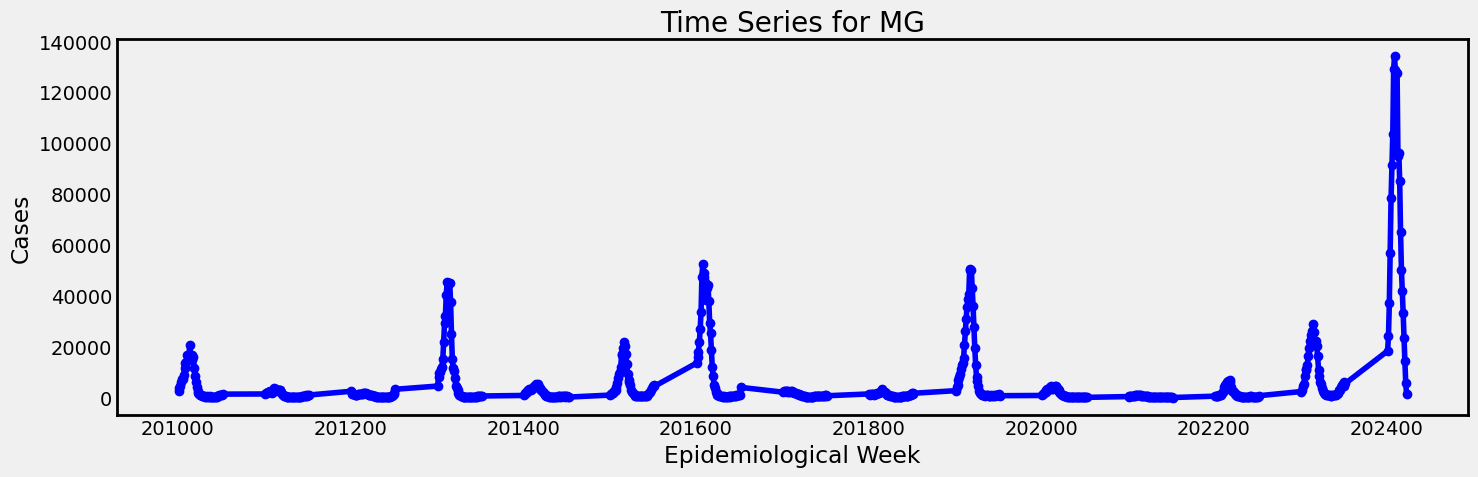

All plots have been saved to /content/drive/MyDrive/Colab Notebook/Colab Notebook/infodengueresults2024/info dengue data and model/png/png


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# List of states to plot
# states = ['SC', 'RS', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR',
#           'RJ', 'RN', 'RO', 'RR', 'MA', 'BA', 'CE', 'ES', 'GO', 'MG', 'AC', 'AL',
#           'SP', 'SE', 'AM', 'AP', 'TO', 'DF']
states = ['MG']
# Base directory to save the plots
base_dir = '/content/drive/MyDrive/Colab Notebook/Colab Notebook/infodengueresults2024/info dengue data and model/png'

# Directory to save the plots (with 'png' subdirectory)
save_dir = os.path.join(base_dir, 'png')

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Convert the 'date' column to datetime to extract the year
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# Create time series plots for each state
for state in states:
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df['epiweek'], df[state], marker='o', linestyle='-', color='blue')
    ax.set_title(f'Time Series for {state}')
    ax.set_xlabel('Epidemiological Week')
    ax.set_ylabel('Cases')
    ax.grid(False)

    # Add a black rectangle boundary to the plot
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)

    #plt.xticks(ticks=df['epiweek'], labels=df['date'], rotation=90)
    #plt.xticks(ticks=df['epiweek'], labels=df['year'], rotation=90)
    plt.tight_layout()

    # Save the plot as a PNG file
    save_path = os.path.join(save_dir, f'{state}_time_series.png')
    plt.savefig(save_path)
    plt.show()
    #plt.close()  # Close the plot to free up memory

print(f"All plots have been saved to {save_dir}")


# Final Weekly epidemiological Data and Normalized Data

In [ ]:
path = '/content/drive/MyDrive/Colab Notebook/Colab Notebook/infodengue2024 /info dengue data and model'
## Load all_federal_units_epidemiological_data
file = 'all_federal_units_weekly_epdio_regular_normalized_data.csv'
df = pd.read_csv(os.path.join(path, file), low_memory=False)
df

date  epiweek     SC     RS    MS    MT   PA   PB    PE   PI  ...  \
0    2010-01-03   201001     14     13  2515  4122  177   12   131   65  ...   
1    2010-01-10   201002     27     17  3063  4130  257   28   147   72  ...   
2    2010-01-17   201003     23     14  4045  3938  257   26   172   67  ...   
3    2010-01-24   201004     16     13  4733  3629  268   56   225   94  ...   
4    2010-01-31   201005     22     22  5135  3287  324   73   321  113  ...   
..          ...      ...    ...    ...   ...   ...  ...  ...   ...  ...  ...   
748  2024-05-05   202419  20797  12294  1210  2799  661  387  1469  616  ...   
749  2024-05-12   202420  17078  11112   818  1970  570  396  1355  528  ...   
750  2024-05-19   202421   8430   3703   456  1379  356  325  1150  405  ...   
751  2024-05-26   202422   4883   2628    53   573  138  247   695  196  ...   
752  2024-06-02   202423   2222    596     1   240   25  120   165   44  ...   

     normalized_GO  normalized_MG  normalized_AC  normalized_AL  \
0         0.275531       0.020490       0.331166       0.035108   
1         0.344753       0.027471       0.382409       0.041903   
2         0.357078       0.034393       0.385086       0.066440   
3         0.364222       0.045885       0.533078       0.073235   
4         0.362662       0.053233       0.763671       0.109098   
..             ...            ...            ...            ...   
748       0.664906       0.249012       0.042447       0.138165   
749       0.527870       0.174013       0.024474       0.143450   
750       0.341483       0.107496       0.025621       0.094375   
751       0.182865       0.042771       0.032505       0.014345   
752       0.040296       0.009438       0.002677       0.000000   

     normalized_SP  normalized_SE  normalized_AM  normalized_AP  \
0         0.020412       0.019347       0.025322       0.059361   
1         0.026857       0.026602       0.024227       0.091324   
2         0.033071       0.016929       0.009171       0.059361   
3         0.044088       0.015719       0.012866       0.083714   
4         0.057278       0.009674       0.014645       0.168950   
..             ...            ...            ...            ...   
748       0.873308       0.280532       0.023132       0.066971   
749       0.756969       0.229746       0.020531       0.048706   
750       0.497504       0.206771       0.025322       0.004566   
751       0.252349       0.128174       0.018067       0.000000   
752       0.069057       0.015719       0.004106       0.000000   

     normalized_TO  normalized_DF  
0         0.221103       0.005654  
1         0.237010       0.011307  
2         0.288971       0.014885  
3         0.314952       0.019523  
4         0.320255       0.024514  
..             ...            ...  
748       0.234889       0.132553  
749       0.202545       0.108569  
750       0.184517       0.096157  
751       0.170201       0.063869  
752       0.059915       0.022438  

[753 rows x 57 columns]

# Calculate max and min values to convert the forecasting into regular intervals

In [ ]:
# List of states/columns to normalize
columns_to_normalize = ['SC', 'RS', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR',
                        'RJ', 'RN', 'RO', 'RR', 'MA', 'BA', 'CE', 'ES', 'GO', 'MG', 'AC', 'AL',
                        'SP', 'SE', 'AM', 'AP', 'TO', 'DF']

# Initialize a dictionary to store the max values for each column
max_values = {}
min_values= {}

# Normalize each column and store the max value
for col in columns_to_normalize:
    max_value = df[col].max()
    min_value = df[col].min()
    max_values[col] = max_value
    min_values[col] = min_value
    df[f'normalized_{col}'] = (df[col] - min_value) / (max_value - min_value)

# Display the max values
print(max_values)
print(min_values)
# Display the dataframe with normalized columns
print(df.head())

# Combine min and max values into a new DataFrame
min_max_df = pd.DataFrame({'min_values': min_values, 'max_values': max_values})

# Save the min and max values DataFrame to a CSV file
min_max_df.to_csv('min_max_values.csv', index_label='Column')
min_max_df

{'SC': 32682, 'RS': 18365, 'MS': 8784, 'MT': 4130, 'PA': 1796, 'PB': 3292, 'PE': 9677, 'PI': 2872, 'PR': 46870, 'RJ': 28141, 'RN': 6354, 'RO': 3033, 'RR': 712, 'MA': 2374, 'BA': 20710, 'CE': 7835, 'ES': 10690, 'GO': 19955, 'MG': 133971, 'AC': 2618, 'AL': 2649, 'SP': 143194, 'SE': 827, 'AM': 7312, 'AP': 657, 'TO': 1889, 'DF': 22659}
{'SC': 1, 'RS': 0, 'MS': 1, 'MT': 33, 'PA': 2, 'PB': 8, 'PE': 22, 'PI': 0, 'PR': 49, 'RJ': 2, 'RN': 5, 'RO': 1, 'RR': 0, 'MA': 0, 'BA': 2, 'CE': 11, 'ES': 0, 'GO': 77, 'MG': 50, 'AC': 3, 'AL': 0, 'SP': 138, 'SE': 0, 'AM': 6, 'AP': 0, 'TO': 3, 'DF': 19}
         date  epiweek  SC  RS    MS    MT   PA  PB   PE   PI  ...  \
0  2010-01-03   201001  14  13  2515  4122  177  12  131   65  ...   
1  2010-01-10   201002  27  17  3063  4130  257  28  147   72  ...   
2  2010-01-17   201003  23  14  4045  3938  257  26  172   67  ...   
3  2010-01-24   201004  16  13  4733  3629  268  56  225   94  ...   
4  2010-01-31   201005  22  22  5135  3287  324  73  321  113  

min_values  max_values
SC           1       32682
RS           0       18365
MS           1        8784
MT          33        4130
PA           2        1796
PB           8        3292
PE          22        9677
PI           0        2872
PR          49       46870
RJ           2       28141
RN           5        6354
RO           1        3033
RR           0         712
MA           0        2374
BA           2       20710
CE          11        7835
ES           0       10690
GO          77       19955
MG          50      133971
AC           3        2618
AL           0        2649
SP         138      143194
SE           0         827
AM           6        7312
AP           0         657
TO           3        1889
DF          19       22659

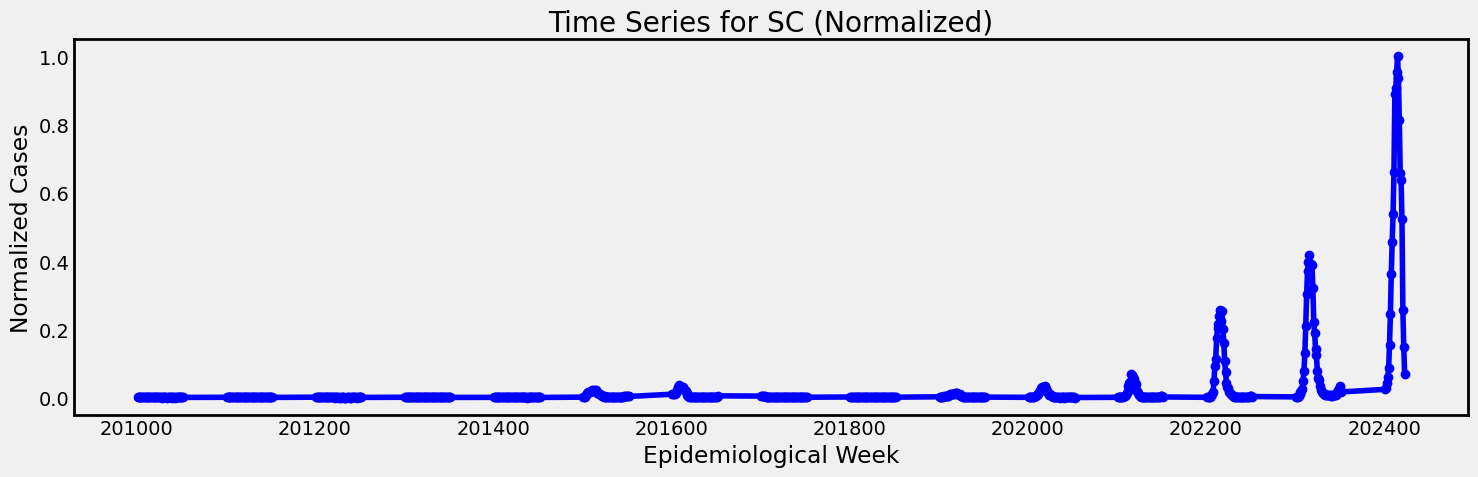

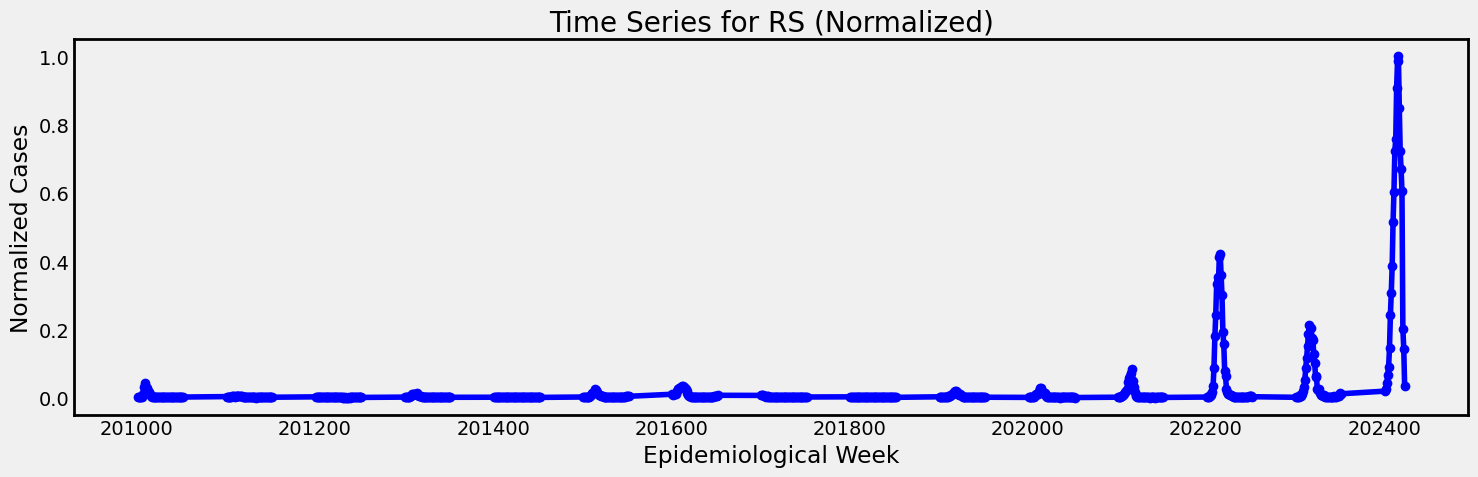

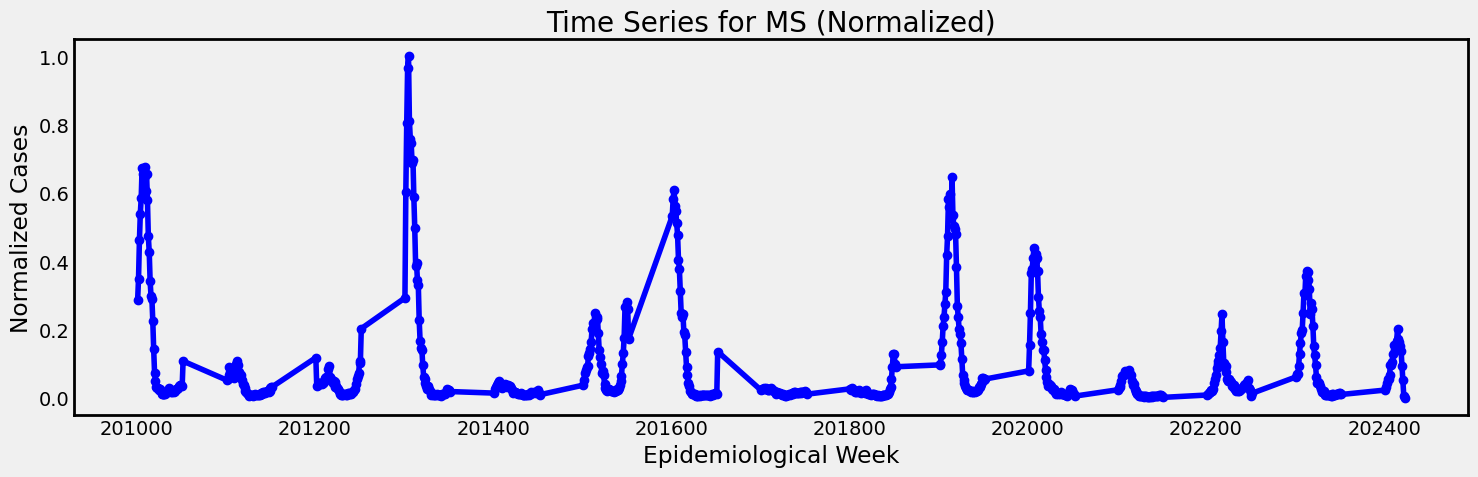

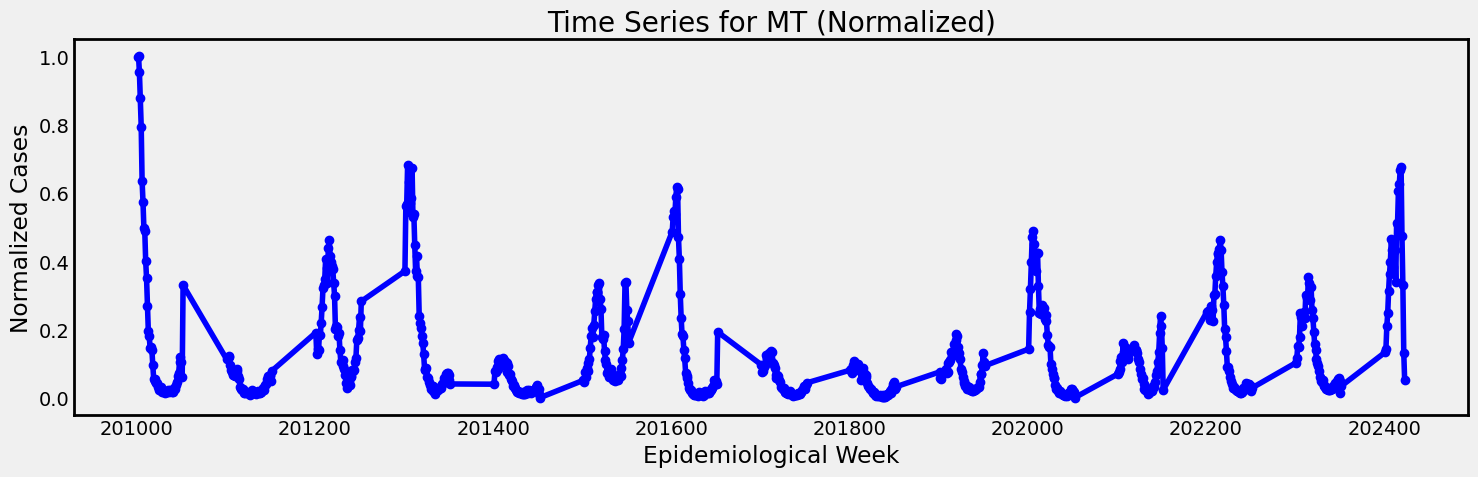

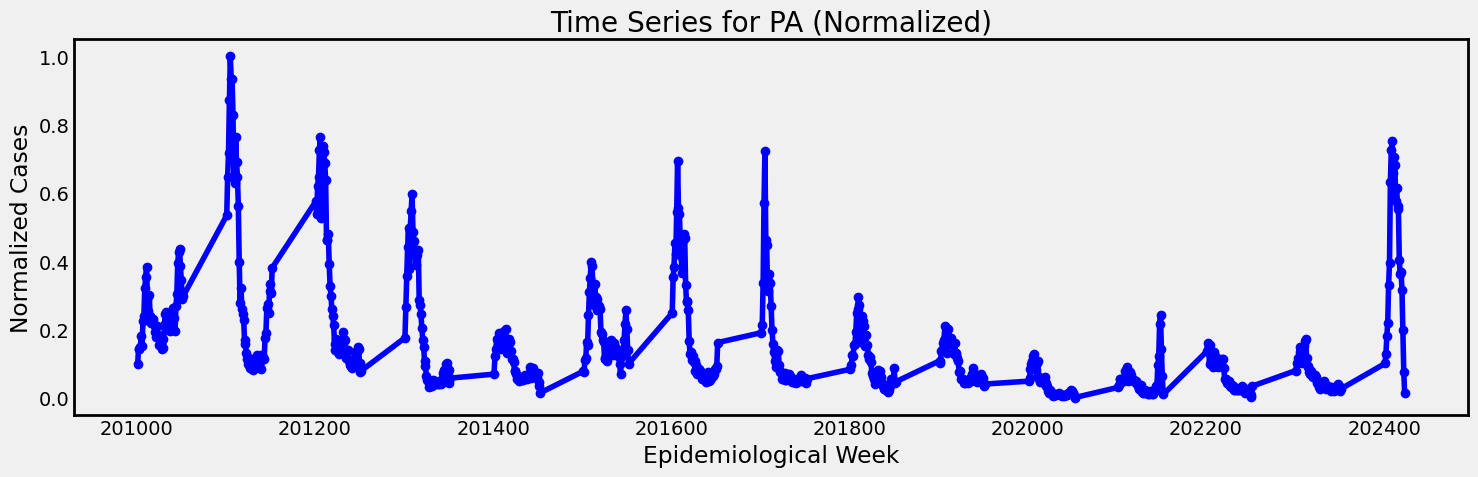

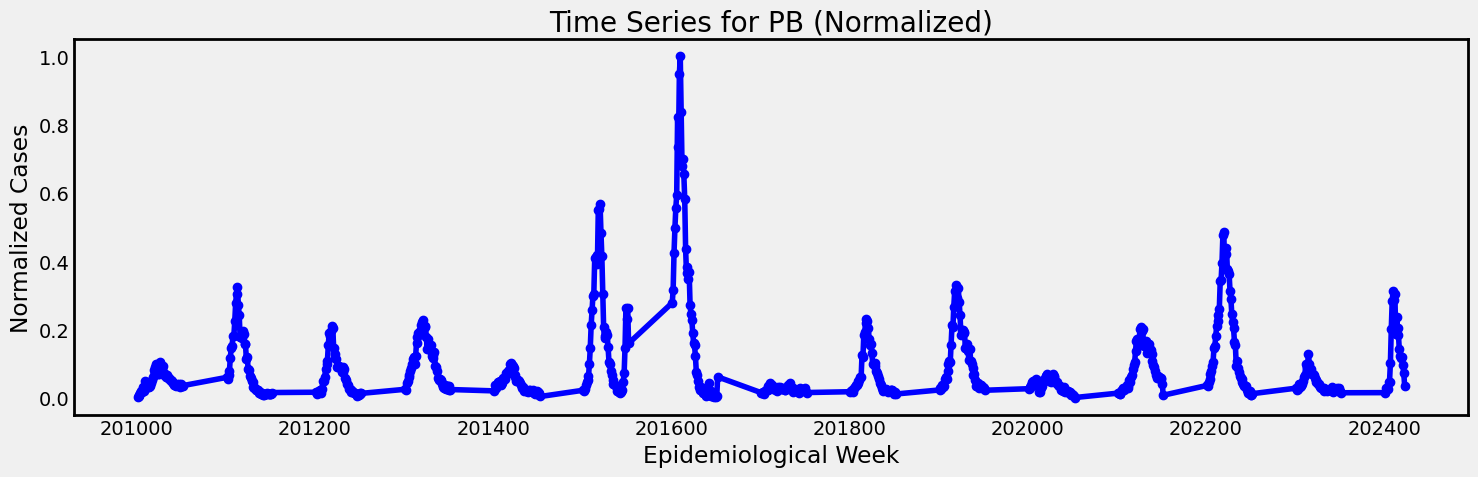

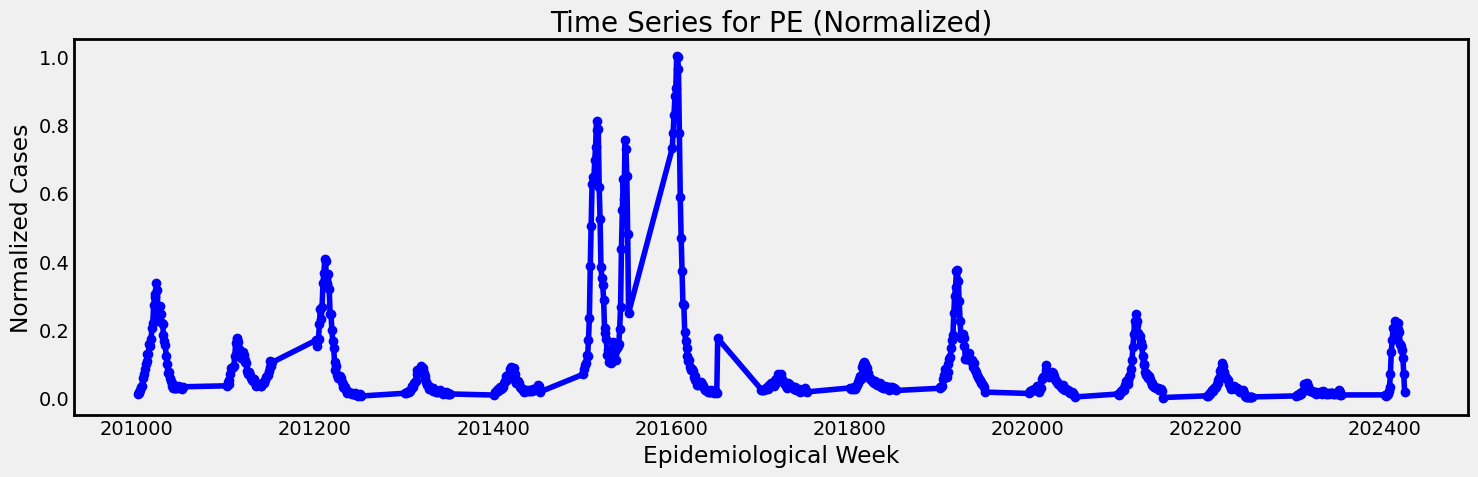

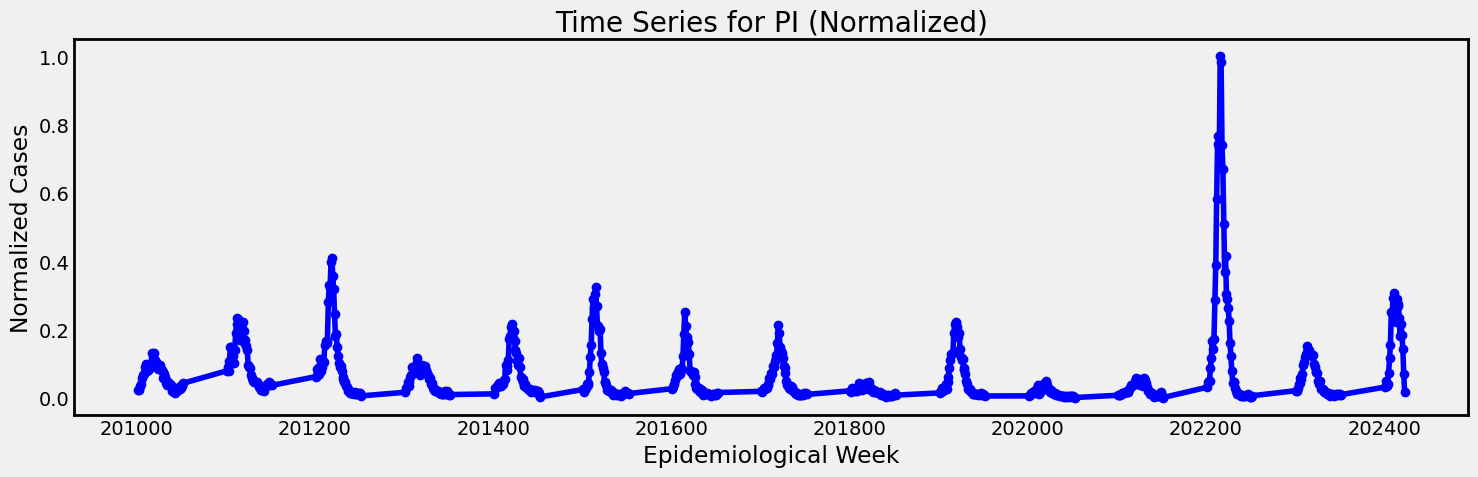

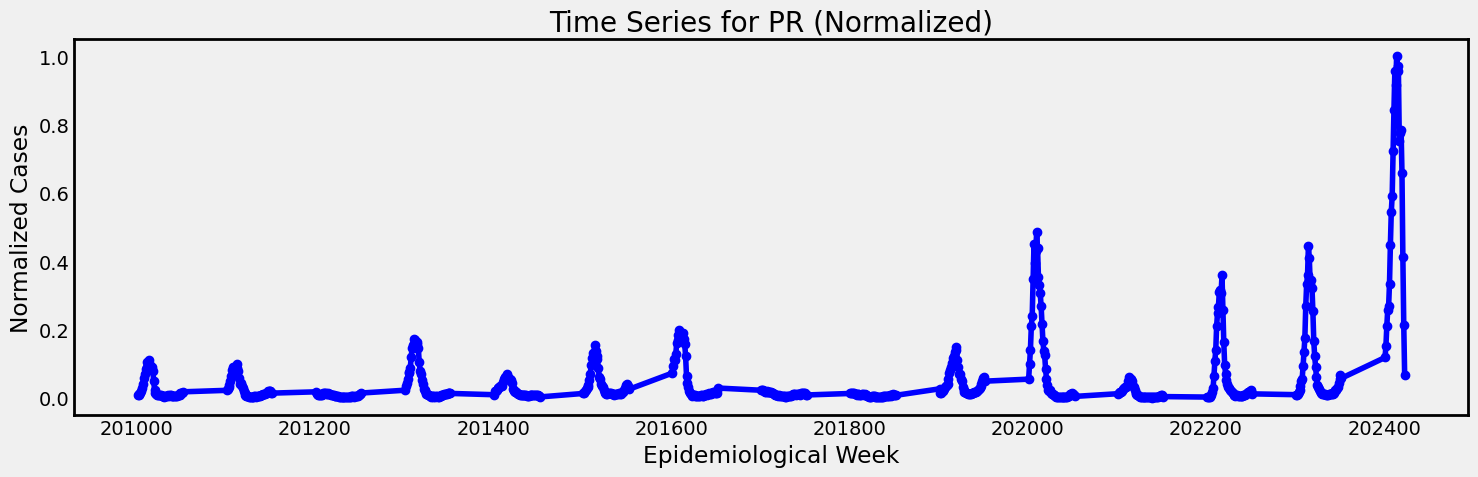

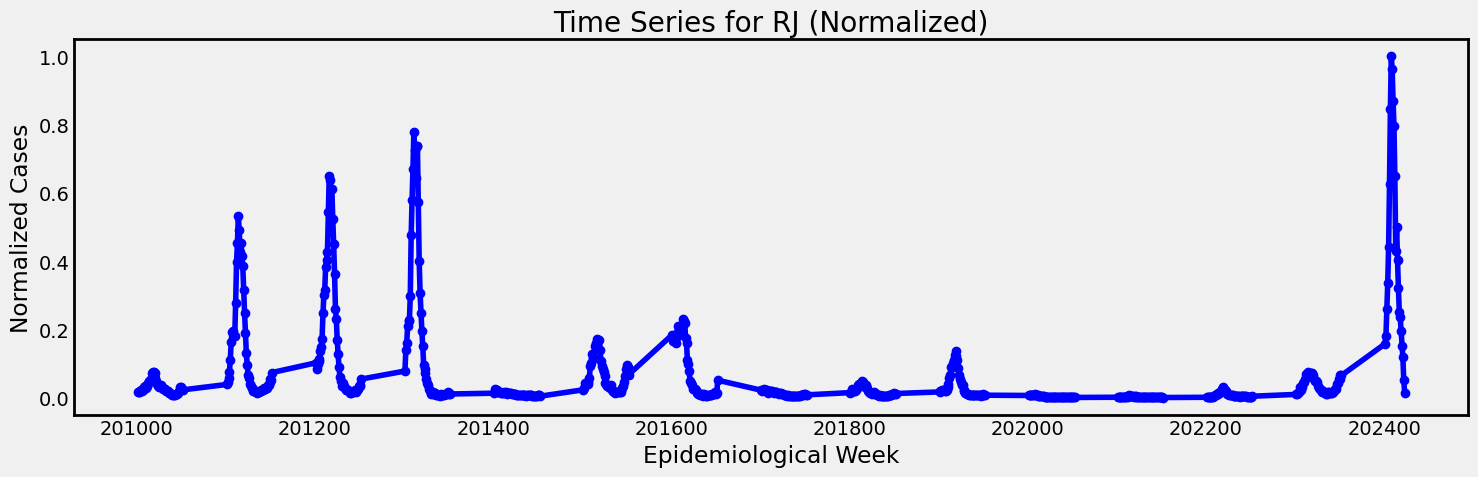

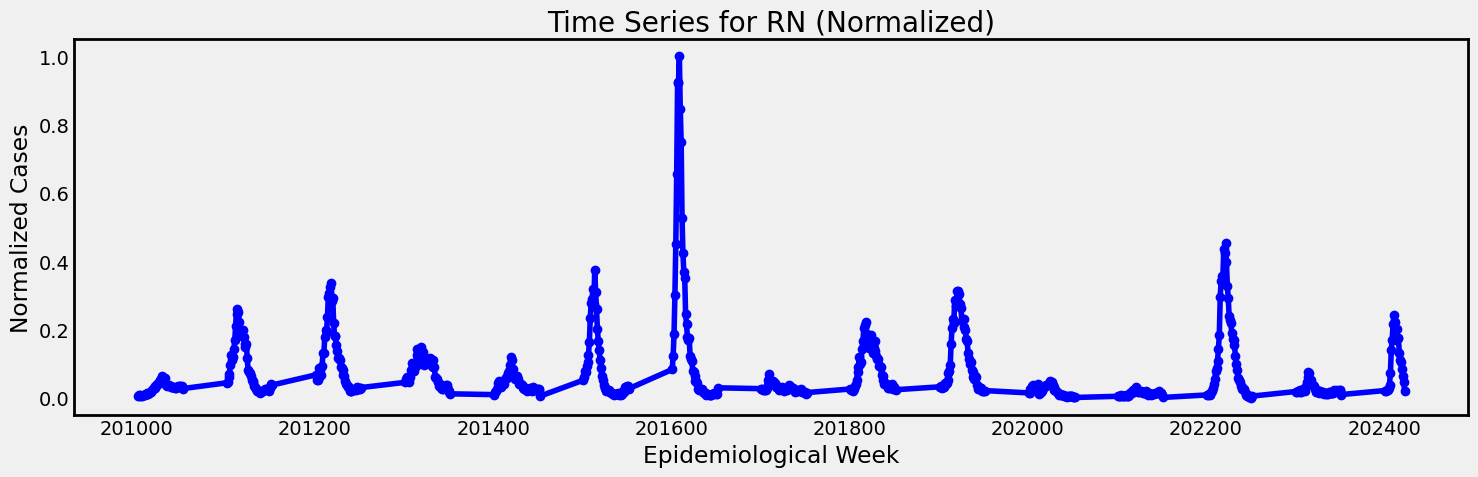

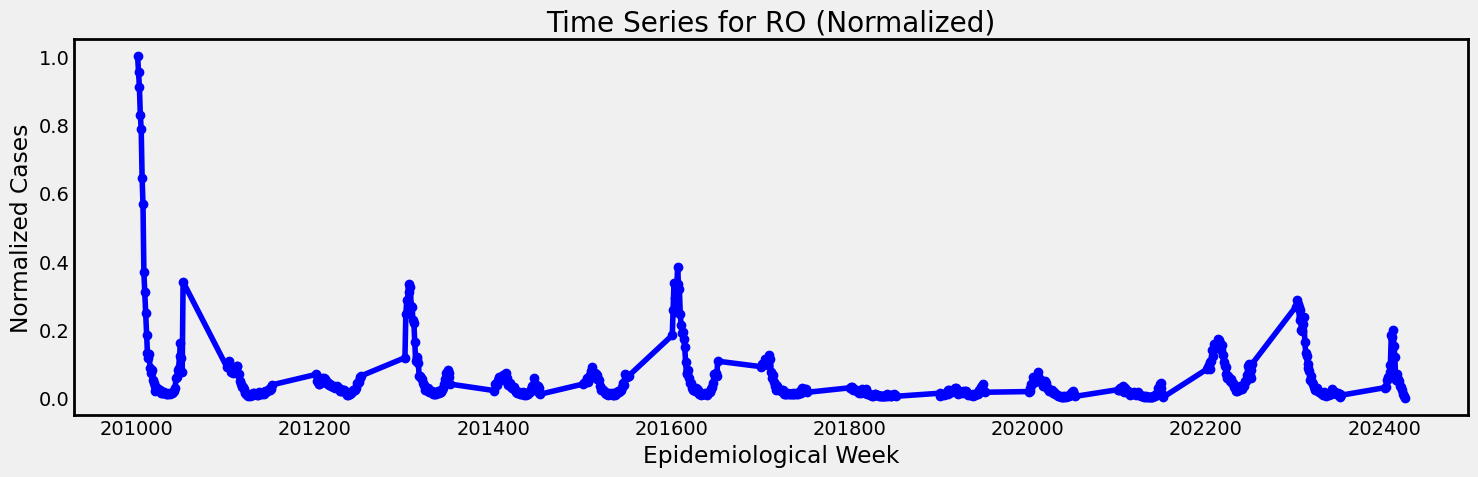

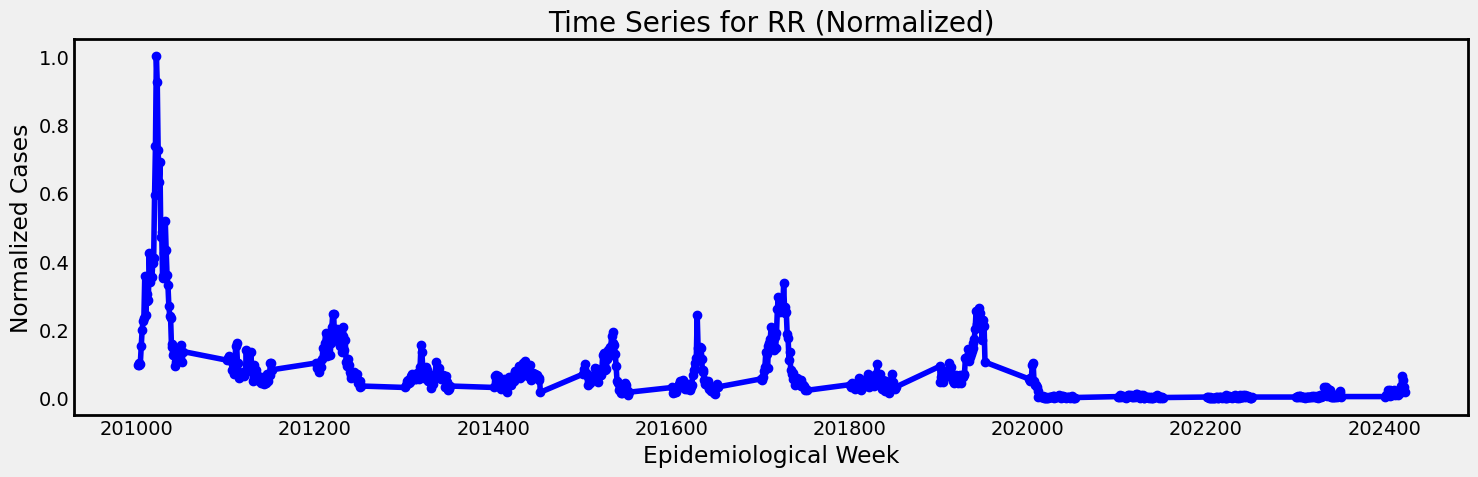

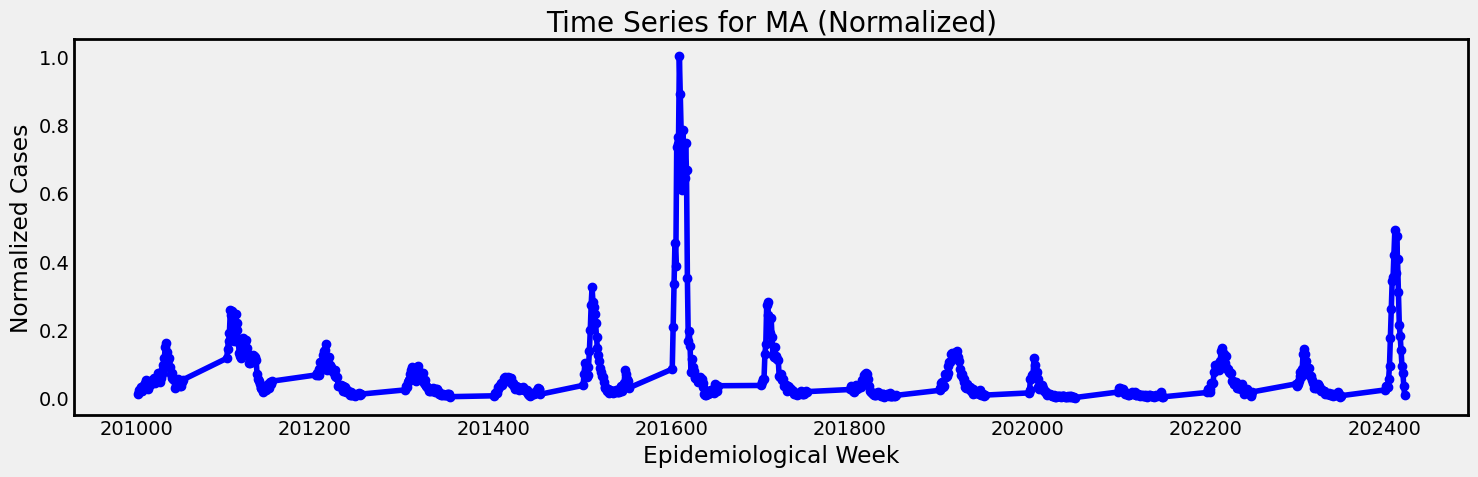

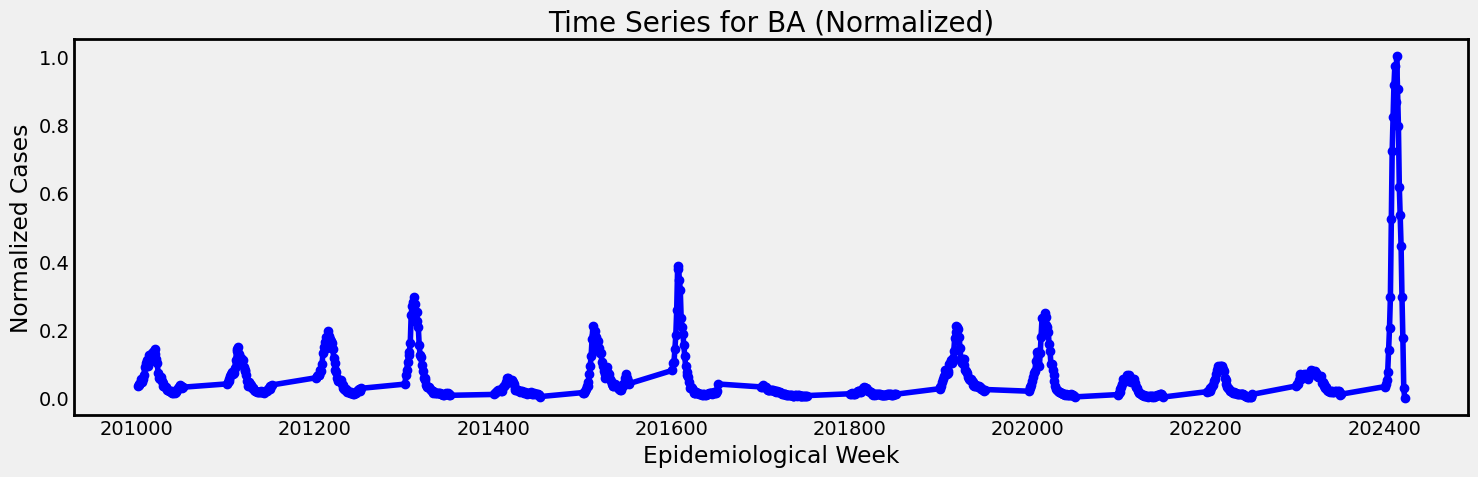

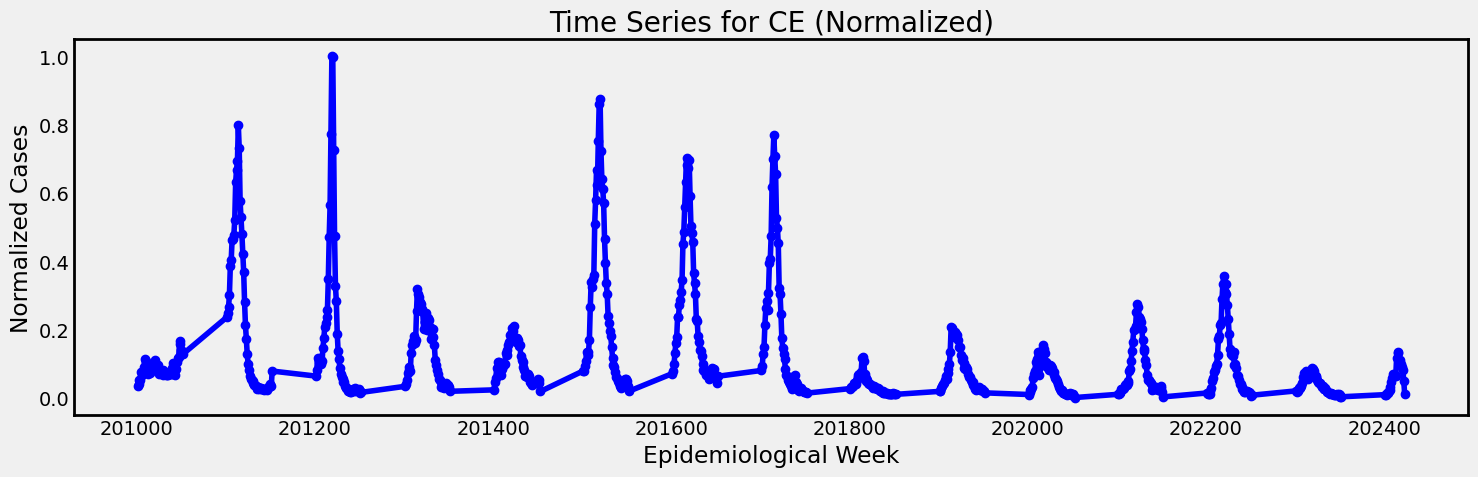

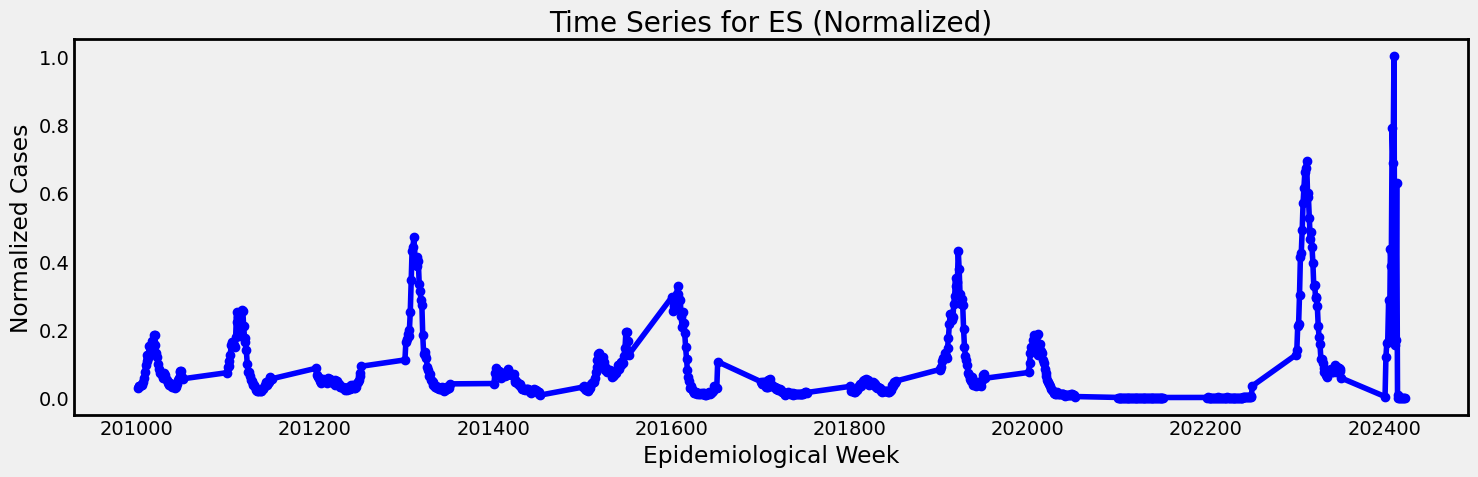

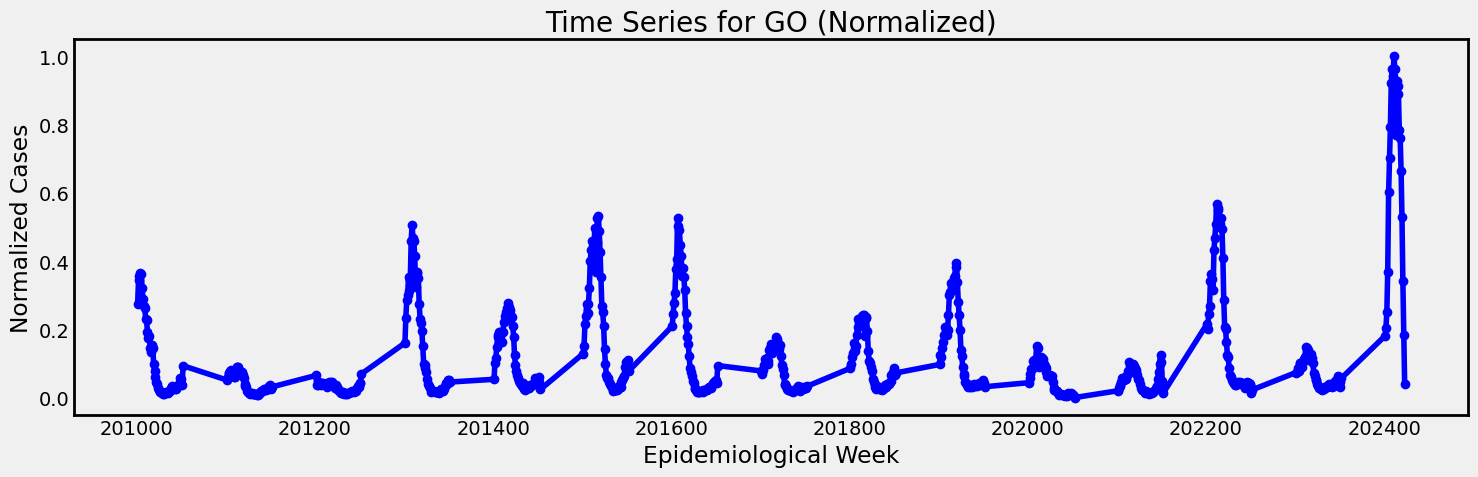

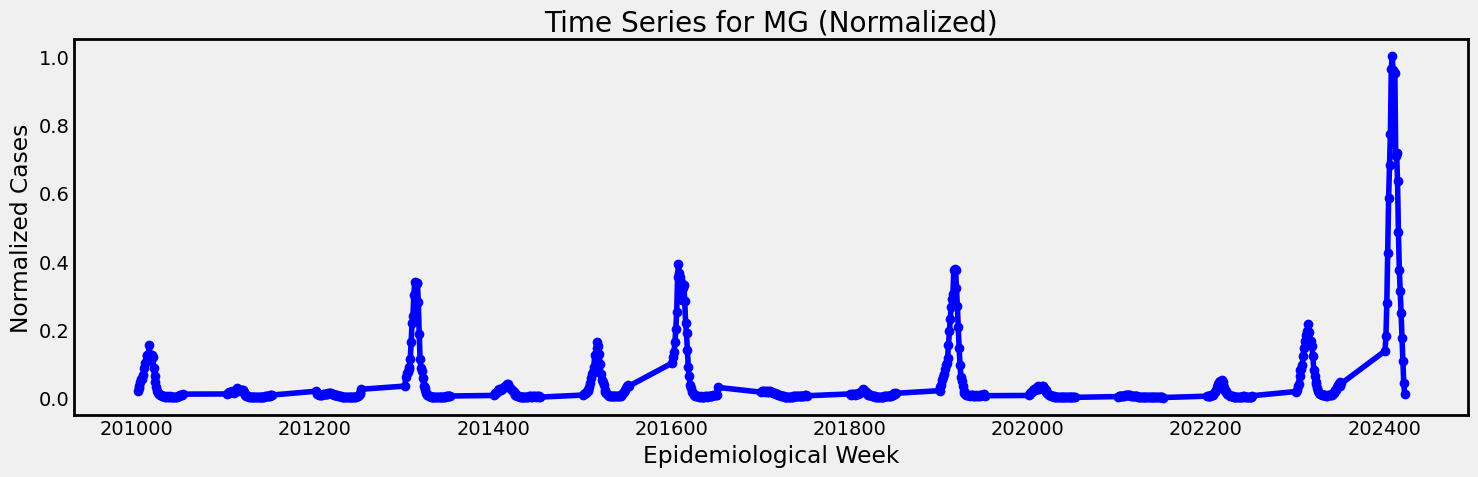

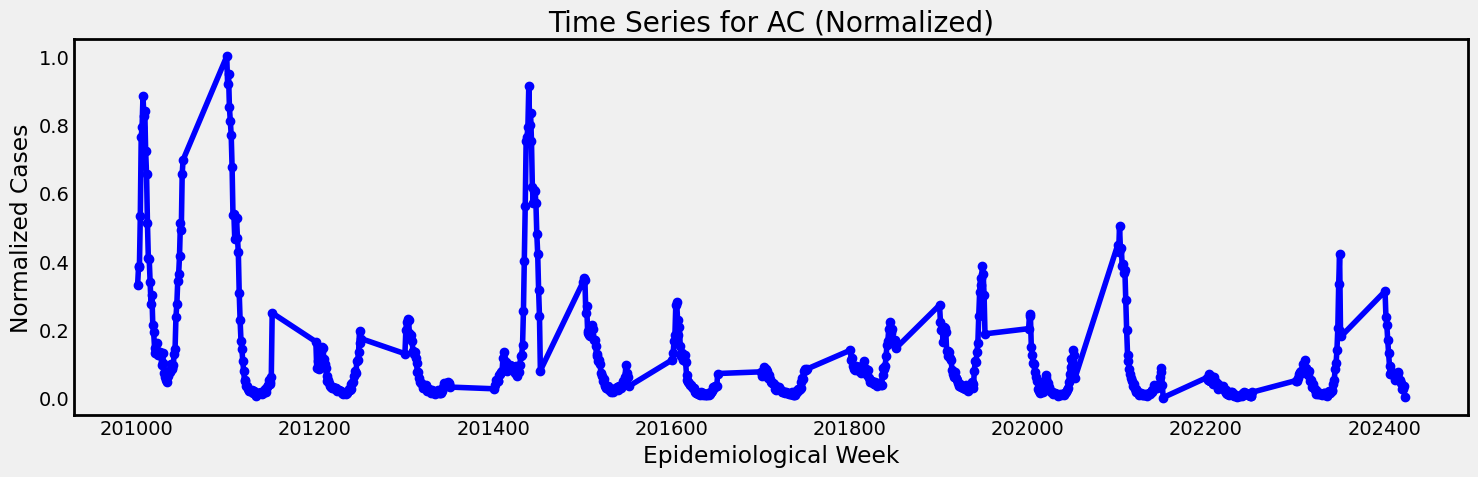

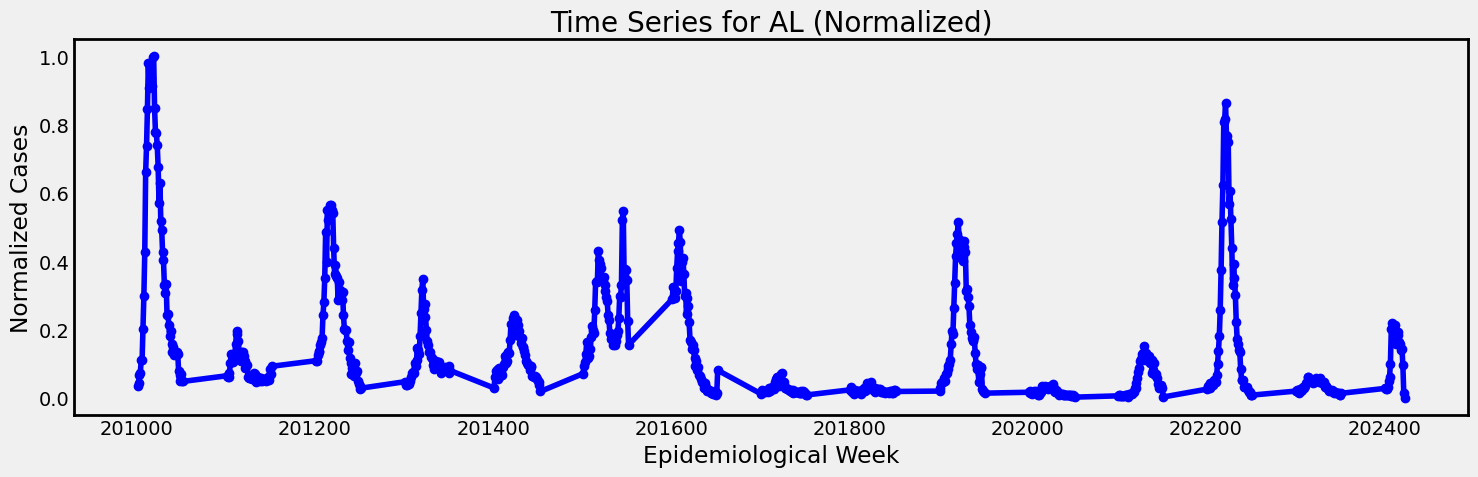

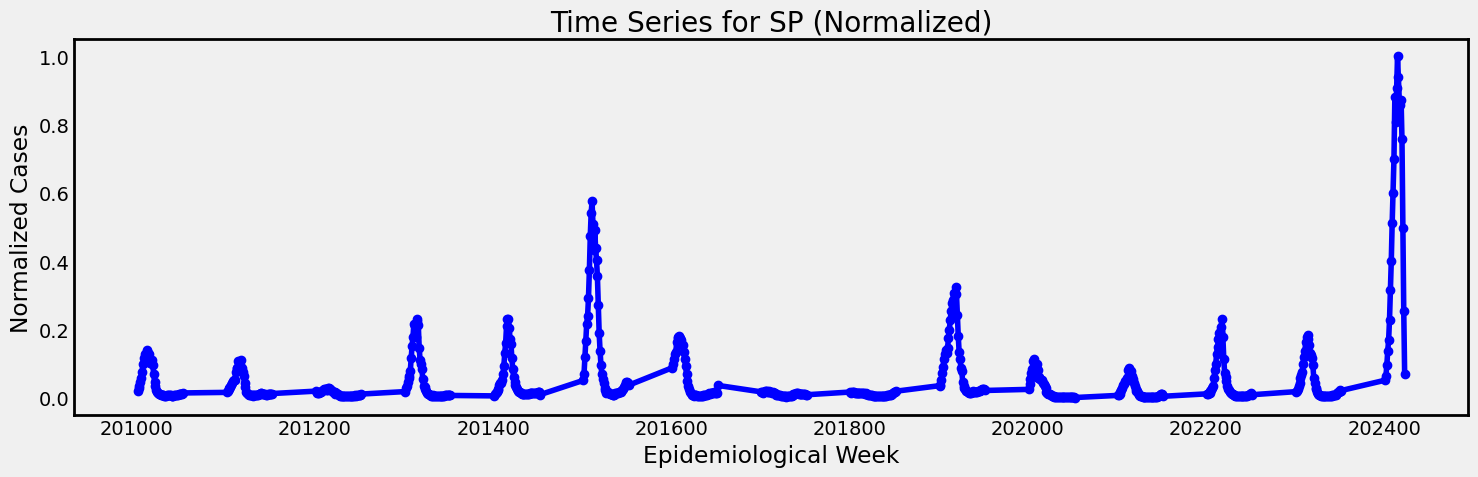

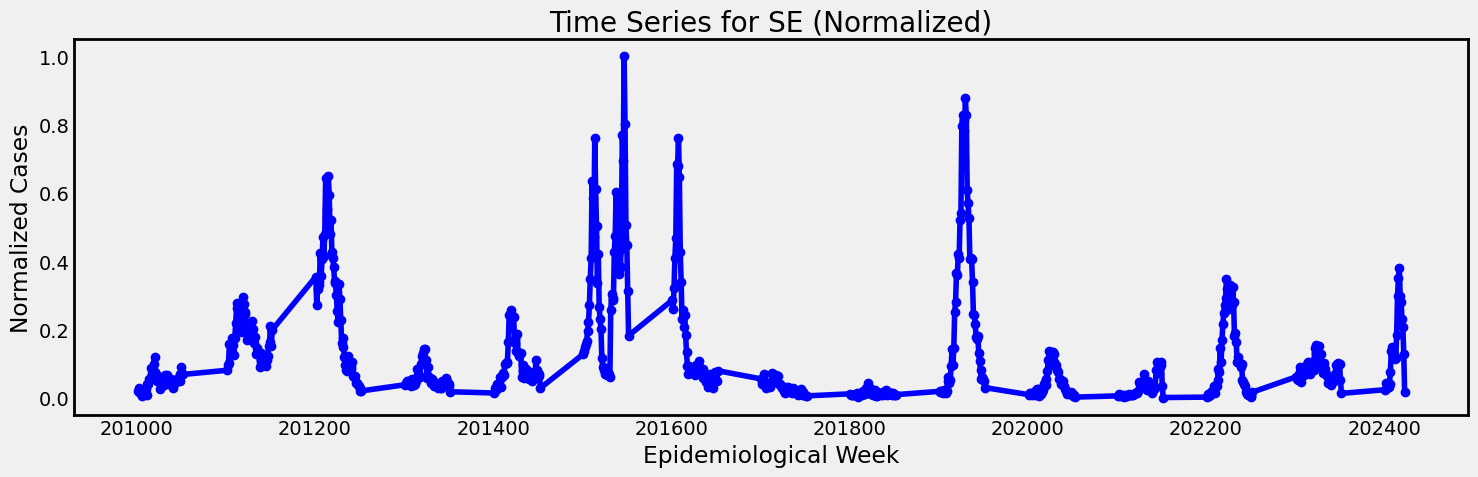

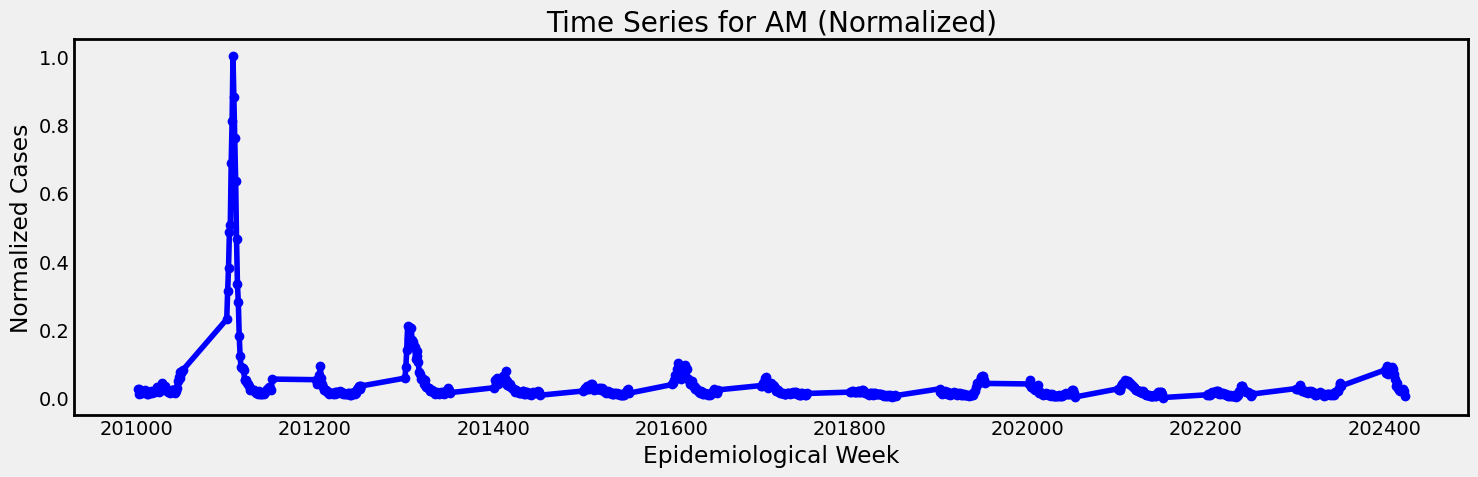

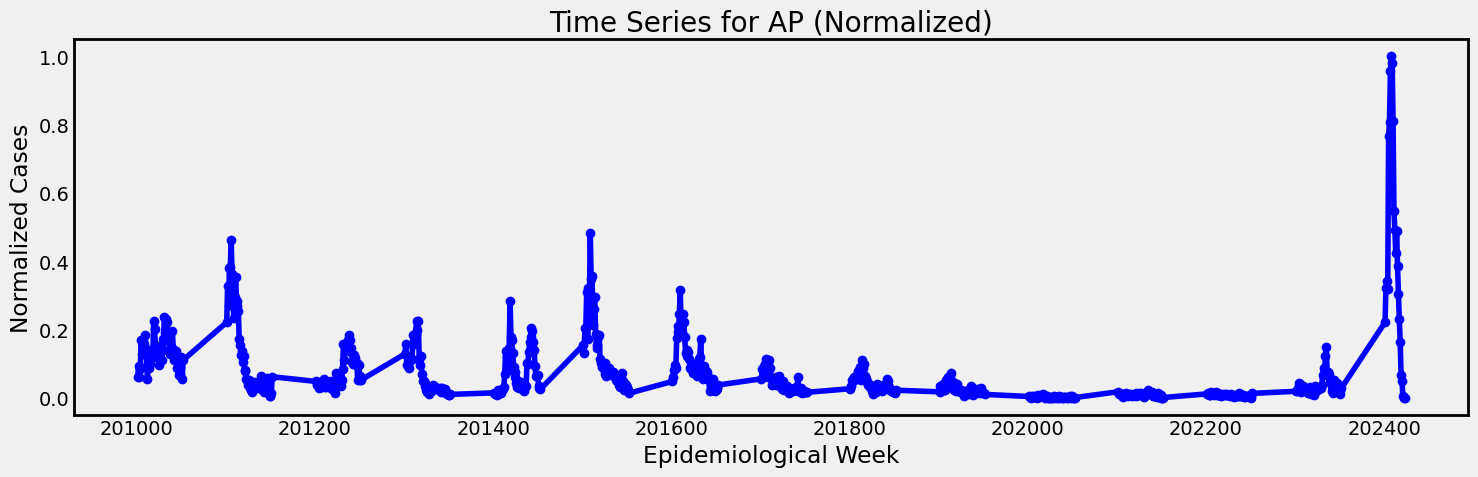

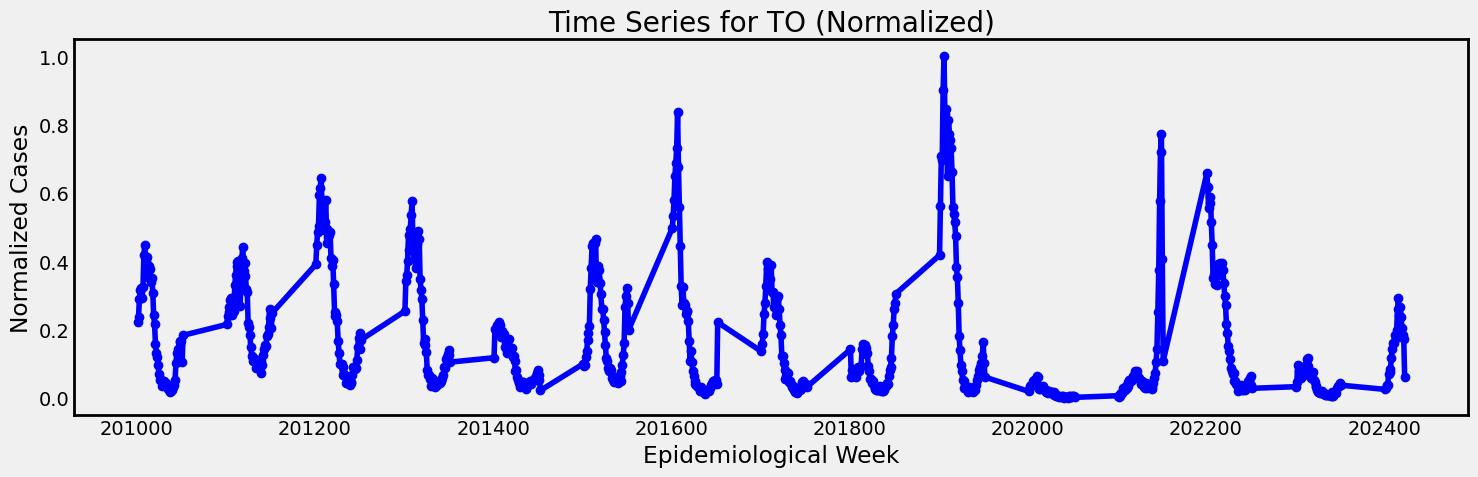

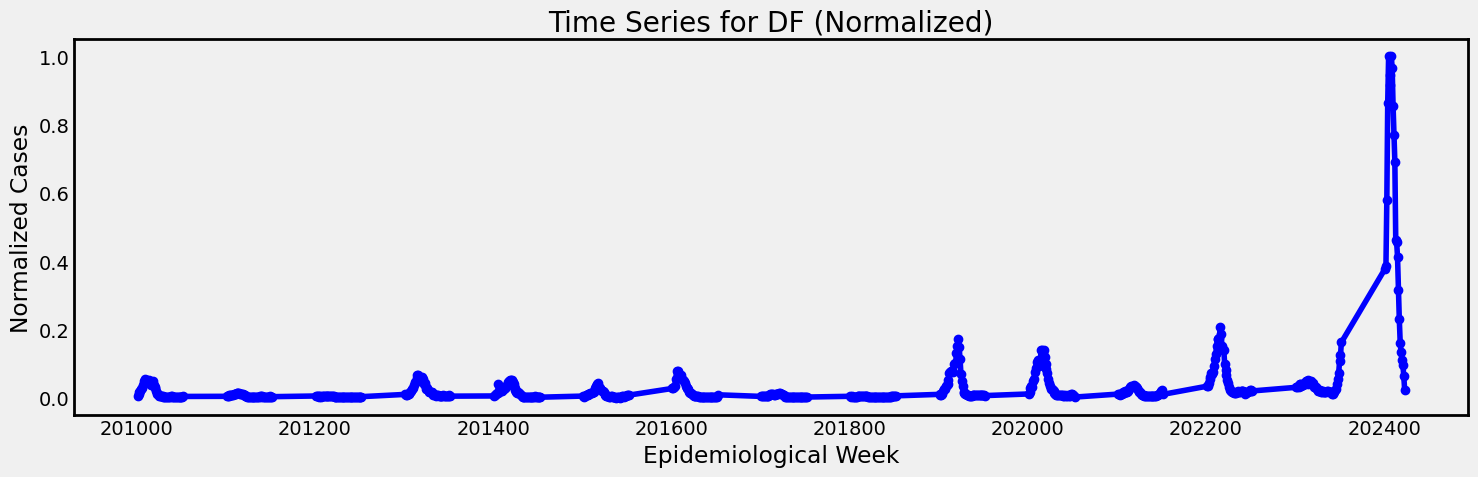

All plots have been saved to /content/drive/MyDrive/Colab Notebook/Colab Notebook/infodengueresults2024/info dengue data and model/png/png


In [ ]:
# import os
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming df is your dataframe

# List of states/columns to normalize
columns_to_normalize = ['SC', 'RS', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR',
                        'RJ', 'RN', 'RO', 'RR', 'MA', 'BA', 'CE', 'ES', 'GO', 'MG', 'AC', 'AL',
                        'SP', 'SE', 'AM', 'AP', 'TO', 'DF']

# Normalize each column
for col in columns_to_normalize:
    max_value = df[col].max()
    min_value = df[col].min()
    df[f'normalized_{col}'] = (df[col] - min_value) / (max_value - min_value)

# Base directory to save the plots
base_dir = '/content/drive/MyDrive/Colab Notebook/Colab Notebook/infodengueresults2024/info dengue data and model/png'

# Directory to save the plots (with 'png' subdirectory)
save_dir = os.path.join(base_dir, 'png')

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Convert the 'date' column to datetime to extract the year
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# Create time series plots for each state
for state in columns_to_normalize:
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df['epiweek'], df[f'normalized_{state}'], marker='o', linestyle='-', color='blue')
    ax.set_title(f'Time Series for {state} (Normalized)')
    ax.set_xlabel('Epidemiological Week')
    ax.set_ylabel('Normalized Cases')
    ax.grid(False)

    # Add a black rectangle boundary to the plot
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)

    #plt.xticks(ticks=df['epiweek'], labels=df['date'], rotation=90)
    #plt.xticks(ticks=df['epiweek'], labels=df['year'], rotation=90)
    plt.tight_layout()

    # Save the plot as a PNG file
    save_path = os.path.join(save_dir, f'{state}_normalized_time_series.png')
    plt.savefig(save_path)
    plt.show()
    #plt.close()  # Close the plot to free up memory

print(f"All plots have been saved to {save_dir}")


# Final forecasting using the normalized data

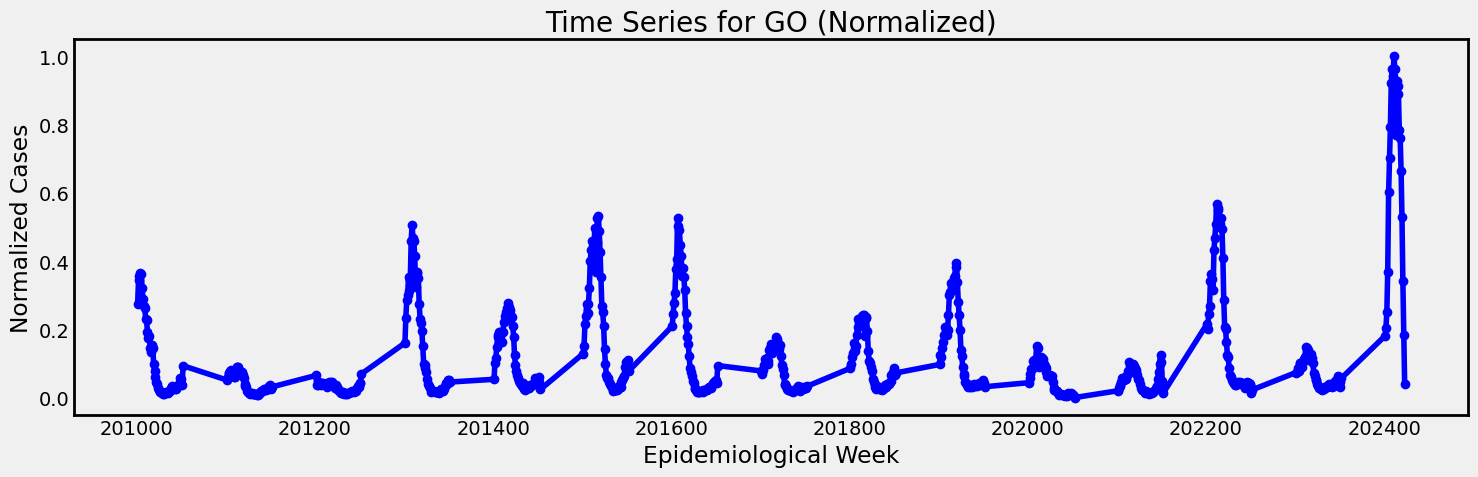

In [ ]:
# import os
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming df is your dataframe

# List of states/columns to normalize
# columns_to_normalize = ['SC', 'RS', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR',
#                         'RJ', 'RN', 'RO', 'RR', 'MA', 'BA', 'CE', 'ES', 'GO', 'MG', 'AC', 'AL',
#                         'SP', 'SE', 'AM', 'AP', 'TO', 'DF']
columns_to_normalize = ['GO']
# Normalize each column
for col in columns_to_normalize:
    max_value = df[col].max()
    min_value = df[col].min()
    df[f'normalized_{col}'] = (df[col] - min_value) / (max_value - min_value)


# Create the directory if it doesn't exist
# os.makedirs(save_dir, exist_ok=True)

# Convert the 'date' column to datetime to extract the year
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# Create time series plots for each state
for state in columns_to_normalize:
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df['epiweek'], df[f'normalized_{state}'], marker='o', linestyle='-', color='blue')
    ax.set_title(f'Time Series for {state} (Normalized)')
    ax.set_xlabel('Epidemiological Week')
    ax.set_ylabel('Normalized Cases')
    ax.grid(False)

    # Add a black rectangle boundary to the plot
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)

    #plt.xticks(ticks=df['epiweek'], labels=df['date'], rotation=90)
    #plt.xticks(ticks=df['epiweek'], labels=df['year'], rotation=90)
    plt.tight_layout()

    # Save the plot as a PNG file
    # save_path = os.path.join(save_dir, f'{state}_normalized_time_series.png')
    # plt.savefig(save_path)
    plt.show()
    #plt.close()  # Close the plot to free up memory

# print(f"All plots have been saved to {save_dir}")


# FINAL **CNN-LSTM ensemble** model

Shape before reshaping: (25, 1)
0
[[ 2794.     0.]
 [ 3729.     0.]
 [ 4656.     0.]
 [ 6195.     0.]
 [ 7179.     0.]
 [ 7238.     0.]
 [ 8886.     0.]
 [11548.     0.]
 [13738.     0.]
 [14065.     0.]
 [16597.     0.]
 [16319.     0.]
 [16882.     0.]
 [20605.     0.]
 [16189.     0.]
 [14713.     0.]
 [16631.     0.]
 [15781.     0.]
 [11514.     0.]
 [ 8495.     0.]
 [ 6254.     0.]
 [ 4132.     0.]
 [ 2670.     0.]
 [ 1807.     0.]
 [ 1343.     0.]]
X-test for level0
[[ 336.    0.]
 [ 310.    0.]
 [ 396.    0.]
 [ 324.    0.]
 [ 392.    0.]
 [ 384.    0.]
 [ 522.    0.]
 [ 680.    0.]
 [ 871.    0.]
 [ 982.    0.]
 [ 980.    0.]
 [ 902.    0.]
 [1387.    0.]
 [1443.    0.]
 [1656.    0.]
 [1970.    0.]
 [2087.    0.]
 [2254.    0.]
 [2333.    0.]
 [2494.    0.]
 [2224.    0.]
 [1877.    0.]
 [2189.    0.]
 [2890.    0.]
 [3662.    0.]
 [3210.    0.]
 [3221.    0.]
 [3008.    0.]
 [2691.    0.]
 [2947.    0.]
 [2847.    0.]
 [2818.    0.]
 [2127.    0.]
 [1512.    0.]
 [1131.    0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Test RMSE: 260.6512347953452
Best Test R2 Score: 0.9381449899151855
true_data len 52  with i : 0
[ 310  396  324  392  384  522  680  871  982  980  902 1387 1443 1656
 1970 2087 2254 2333 2494 2224 1877 2189 2890 3662 3210 3221 3008 2691
 2947 2847 2818 2127 1512 1131  837  617  469  448  388  320  290  304
  303  285  275  237  249  281  305  289  354  329]
X_pred len 52  with i : 0
[[[ 336.    0.]]

 [[ 310.    0.]]

 [[ 396.    0.]]

 [[ 324.    0.]]

 [[ 392.    0.]]

 [[ 384.    0.]]

 [[ 522.    0.]]

 [[ 680.    0.]]

 [[ 871.    0.]]

 [[ 982.    0.]]

 [[ 980.    0.]]

 [[ 902.    0.]]

 [[1387.    0.]]

 [[1443.    0.]]

 [[1656.    0.]]

 [[1970.    0.]]

 [[2087.    0.]]

 [[2254.    0.]]

 [[2333.    0.]]

 [[2494.    0.]]

 [[2224.    0.]]

 [[1877.    0.]]

 [[2189.    0.]]

 [[2890.    0.]]

 [[3662.    0.]]

 [[3210.    0.]]

 [[3221.    0.]]

 [[3008.    0.]]

 [[2691.    0.]]

 [[2947.    0.]]

 [[2847.    0.]]

 [[2818.    0.]]

 [[2127.    0.]]

 [[1512.    0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model_forecast len 52   with i : 0
[[ 327.8047 ]
 [ 301.93744]
 [ 387.4923 ]
 [ 315.86548]
 [ 383.51434]
 [ 375.55762]
 [ 512.6191 ]
 [ 668.9434 ]
 [ 857.27966]
 [ 966.55414]
 [ 964.58594]
 [ 887.8068 ]
 [1364.8678 ]
 [1419.9254 ]
 [1629.3307 ]
 [1938.0206 ]
 [2053.041  ]
 [2217.215  ]
 [2294.8784 ]
 [2453.1538 ]
 [2187.723  ]
 [1846.5939 ]
 [2153.315  ]
 [2842.4526 ]
 [3601.3884 ]
 [3157.0376 ]
 [3167.8513 ]
 [2958.4556 ]
 [2646.8203 ]
 [2898.488  ]
 [2800.1802 ]
 [2771.6711 ]
 [2092.3643 ]
 [1487.7623 ]
 [1113.1373 ]
 [ 823.7881 ]
 [ 606.6845 ]
 [ 460.03464]
 [ 439.17874]
 [ 379.53607]
 [ 311.8859 ]
 [ 282.044  ]
 [ 295.96887]
 [ 294.97412]
 [ 277.07166]
 [ 267.1284 ]
 [ 229.36642]
 [ 241.28696]
 [ 273.0941 ]
 [ 296.96356]
 [ 281.04953]
 [ 345.71356]]
residuals for 0 of 52
[-1.78046875e+01  9.40625610e+01 -6.34923096e+01  7.61345215e+01
  4.85656738e-01  1.46442383e+02  1.67380920e+02  2.02056580e+02
  1.24720337e+02  1.34458618e+01 -6.25859375e+01  4.99193176e+02
  7.81322021e+01  2

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Test RMSE: 285.6984414823019
Best Test R2 Score: 0.7009262626878219
true_data len 52  with i : 1
[ 358  452  450  528  558  567  654  727  852  830  872 1034 2515 1343
 1475 1395 1210 1210 1020 1188 1373 1498 1392 1524 1465 1489 1801 1926
 1658 1674 1505 1285 1114 1157 1012 1137  924  839  680  652  496  438
  363  313  310  298  272  268  342  356  331  344]
X_pred len 52  with i : 1
[[[ 329.    0.]]

 [[ 358.    0.]]

 [[ 452.    0.]]

 [[ 450.    0.]]

 [[ 528.    0.]]

 [[ 558.    0.]]

 [[ 567.    0.]]

 [[ 654.    0.]]

 [[ 727.    0.]]

 [[ 852.    0.]]

 [[ 830.    0.]]

 [[ 872.    0.]]

 [[1034.    0.]]

 [[2515.    0.]]

 [[1343.    0.]]

 [[1475.    0.]]

 [[1395.    0.]]

 [[1210.    0.]]

 [[1210.    0.]]

 [[1020.    0.]]

 [[1188.    0.]]

 [[1373.    0.]]

 [[1498.    0.]]

 [[1392.    0.]]

 [[1524.    0.]]

 [[1465.    0.]]

 [[1489.    0.]]

 [[1801.    0.]]

 [[1926.    0.]]

 [[1658.    0.]]

 [[1674.    0.]]

 [[1505.    0.]]

 [[1285.    0.]]

 [[1114.    0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model_forecast len 52   with i : 1
[[ 325.17096]
 [ 353.57812]
 [ 445.63977]
 [ 443.68115]
 [ 520.0652 ]
 [ 549.4431 ]
 [ 558.2564 ]
 [ 643.45105]
 [ 714.93567]
 [ 837.34094]
 [ 815.79767]
 [ 856.9259 ]
 [1015.56335]
 [2465.8223 ]
 [1318.1493 ]
 [1447.4094 ]
 [1369.0698 ]
 [1187.9099 ]
 [1187.9099 ]
 [1001.8539 ]
 [1166.3667 ]
 [1347.5265 ]
 [1469.9319 ]
 [1366.1323 ]
 [1495.3923 ]
 [1437.6168 ]
 [1461.1188 ]
 [1766.6426 ]
 [1889.0481 ]
 [1626.611  ]
 [1642.2786 ]
 [1476.7867 ]
 [1261.353  ]
 [1093.9026 ]
 [1136.01   ]
 [ 994.0199 ]
 [1116.4253 ]
 [ 907.8465 ]
 [ 824.61084]
 [ 668.9113 ]
 [ 641.49255]
 [ 488.72855]
 [ 431.92938]
 [ 358.47552]
 [ 309.4961 ]
 [ 306.5569 ]
 [ 294.79922]
 [ 269.31924]
 [ 265.3985 ]
 [ 337.9057 ]
 [ 351.6191 ]
 [ 327.13022]]
residuals for 1 of 52
[ 3.28290405e+01  9.84218750e+01  4.36022949e+00  8.43188477e+01
  3.79348145e+01  1.75568848e+01  9.57435913e+01  8.35489502e+01
  1.37064331e+02 -7.34094238e+00  5.62023315e+01  1.77074097e+02
  1.49943665e+03 -1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Test RMSE: 3589.2416207586493
Best Test R2 Score: 0.9333955341191802
true_data len 52  with i : 2
[  250   362   381   348   405   356   591   649  1008  1359  1938  3299
  4548  8122  9498 10037 11219 12007 15108 21913 29220 32154 40461 45260
 38346 45010 45116 37525 25037 15232 11566 10305  7899  4520  3762  2866
  2009  1218   907   650   561   430   360   341   235   354   370   339
   393   430   381   329]
X_pred len 52  with i : 2
[[[  344.     0.]]

 [[  250.     0.]]

 [[  362.     0.]]

 [[  381.     0.]]

 [[  348.     0.]]

 [[  405.     0.]]

 [[  356.     0.]]

 [[  591.     0.]]

 [[  649.     0.]]

 [[ 1008.     0.]]

 [[ 1359.     0.]]

 [[ 1938.     0.]]

 [[ 3299.     0.]]

 [[ 4548.     0.]]

 [[ 8122.     0.]]

 [[ 9498.     0.]]

 [[10037.     0.]]

 [[11219.     0.]]

 [[12007.     0.]]

 [[15108.     0.]]

 [[21913.     0.]]

 [[29220.     0.]]

 [[32154.     0.]]

 [[40461.     0.]]

 [[45260.     0.]]

 [[38346.     0.]]

 [[45010.     0.]]

 [[45116.    

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model_forecast len 52   with i : 2
[[  342.37885]
 [  247.71375]
 [  360.42328]
 [  379.44867]
 [  346.39056]
 [  403.45352]
 [  354.4108 ]
 [  588.8612 ]
 [  646.5551 ]
 [ 1003.3363 ]
 [ 1352.0554 ]
 [ 1927.2808 ]
 [ 3279.4065 ]
 [ 4520.2627 ]
 [ 8070.9575 ]
 [ 9437.984  ]
 [ 9973.471  ]
 [11147.764  ]
 [11930.624  ]
 [15011.405  ]
 [21772.031  ]
 [29031.387  ]
 [31946.256  ]
 [40199.09   ]
 [44966.797  ]
 [38097.883  ]
 [44718.42   ]
 [44823.734  ]
 [37282.234  ]
 [24875.662  ]
 [15134.597  ]
 [11492.5    ]
 [10239.723  ]
 [ 7849.4116 ]
 [ 4492.445  ]
 [ 3739.3872 ]
 [ 2849.2295 ]
 [ 1997.8179 ]
 [ 1211.9738 ]
 [  902.98505]
 [  647.5496 ]
 [  559.0051 ]
 [  428.43094]
 [  358.4193 ]
 [  339.36935]
 [  232.52   ]
 [  352.40607]
 [  368.43646]
 [  337.36267]
 [  391.45462]
 [  428.4309 ]
 [  379.44867]]
residuals for 2 of 52
[   -92.37884521    114.28625488     20.57672119    -31.44866943
     58.60943604    -47.45352173    236.58920288     60.13879395
    361.44488525    355.66369629

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Test RMSE: 337.06895249352254
Best Test R2 Score: 0.9563330395326378
true_data len 52  with i : 3
[ 322  419  426  390  415  429  605  584  698  750  740  655  863 1652
 1895 2168 2634 3037 3447 3510 3149 3240 3755 4317 4611 4593 5265 4916
 5435 4331 3936 3327 2912 2473 2108 1650 1159 1025  698  653  483  433
  407  334  353  368  373  346  389  376  414  492]
X_pred len 52  with i : 3
[[[ 329.    0.]]

 [[ 322.    0.]]

 [[ 419.    0.]]

 [[ 426.    0.]]

 [[ 390.    0.]]

 [[ 415.    0.]]

 [[ 429.    0.]]

 [[ 605.    0.]]

 [[ 584.    0.]]

 [[ 698.    0.]]

 [[ 750.    0.]]

 [[ 740.    0.]]

 [[ 655.    0.]]

 [[ 863.    0.]]

 [[1652.    0.]]

 [[1895.    0.]]

 [[2168.    0.]]

 [[2634.    0.]]

 [[3037.    0.]]

 [[3447.    0.]]

 [[3510.    0.]]

 [[3149.    0.]]

 [[3240.    0.]]

 [[3755.    0.]]

 [[4317.    0.]]

 [[4611.    0.]]

 [[4593.    0.]]

 [[5265.    0.]]

 [[4916.    0.]]

 [[5435.    0.]]

 [[4331.    0.]]

 [[3936.    0.]]

 [[3327.    0.]]

 [[2912.    

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model_forecast len 52   with i : 3
[[ 320.21817]
 [ 313.4454 ]
 [ 407.26474]
 [ 414.03326]
 [ 379.22153]
 [ 403.3969 ]
 [ 416.93396]
 [ 587.07526]
 [ 566.7766 ]
 [ 676.9665 ]
 [ 727.22705]
 [ 717.5616 ]
 [ 635.4045 ]
 [ 836.4454 ]
 [1599.0334 ]
 [1833.8989 ]
 [2097.76   ]
 [2548.1602 ]
 [2937.6694 ]
 [3333.9443 ]
 [3394.8354 ]
 [3045.9204 ]
 [3133.8738 ]
 [3631.6338 ]
 [4174.8203 ]
 [4458.9785 ]
 [4441.5806 ]
 [5091.0854 ]
 [4753.7686 ]
 [5255.395  ]
 [4188.3516 ]
 [3806.5747 ]
 [3217.9614 ]
 [2816.854  ]
 [2392.5496 ]
 [2039.7687 ]
 [1597.1006 ]
 [1122.5371 ]
 [ 993.02277]
 [ 676.9665 ]
 [ 633.47125]
 [ 469.14258]
 [ 420.8016 ]
 [ 395.6611 ]
 [ 325.05554]
 [ 343.4357 ]
 [ 357.94446]
 [ 362.7804 ]
 [ 336.66443]
 [ 378.2544 ]
 [ 365.68195]
 [ 402.42993]]
residuals for 3 of 52
[   1.78182983  105.55459595   18.73526001  -24.03326416   35.7784729
   25.60308838  188.06604004   -3.07525635  131.22338867   73.0335083
   12.77294922  -62.56158447  227.59552002  815.55462646  295.96655273
  3

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Test RMSE: 1401.6858531739929
Best Test R2 Score: 0.9462719657687315
true_data len 53  with i : 4
[  467   452   487   430   587   530   610   446   575   499   478   382
   233  1011  1414  1731  1976  2581  2649  3094  4038  5839  7651  9397
 10175 12190 16709 17271 19427 21789 20231 17235 13122  9212  6829  6200
  4784  3042  2052  1689  1253  1019   813   687   612   553   493   508
   453   606   597   585   596]
X_pred len 53  with i : 4
[[[  492.     0.]]

 [[  467.     0.]]

 [[  452.     0.]]

 [[  487.     0.]]

 [[  430.     0.]]

 [[  587.     0.]]

 [[  530.     0.]]

 [[  610.     0.]]

 [[  446.     0.]]

 [[  575.     0.]]

 [[  499.     0.]]

 [[  478.     0.]]

 [[  382.     0.]]

 [[  233.     0.]]

 [[ 1011.     0.]]

 [[ 1414.     0.]]

 [[ 1731.     0.]]

 [[ 1976.     0.]]

 [[ 2581.     0.]]

 [[ 2649.     0.]]

 [[ 3094.     0.]]

 [[ 4038.     0.]]

 [[ 5839.     0.]]

 [[ 7651.     0.]]

 [[ 9397.     0.]]

 [[10175.     0.]]

 [[12190.     0.]]

 [[1670

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model_forecast len 53   with i : 4
[[  504.74738]
 [  479.82983]
 [  464.8786 ]
 [  499.76392]
 [  442.9489 ]
 [  599.4267 ]
 [  542.6201 ]
 [  622.34814]
 [  458.89795]
 [  587.4675 ]
 [  511.72406]
 [  490.7937 ]
 [  395.09433]
 [  246.32027]
 [ 1021.9717 ]
 [ 1423.5898 ]
 [ 1739.5039 ]
 [ 1983.6648 ]
 [ 2586.5935 ]
 [ 2654.3608 ]
 [ 3097.8372 ]
 [ 4038.605  ]
 [ 5833.4385 ]
 [ 7639.2354 ]
 [ 9379.257  ]
 [10154.594  ]
 [12162.695  ]
 [16666.22   ]
 [17226.297  ]
 [19374.918  ]
 [21728.832  ]
 [20176.164  ]
 [17190.422  ]
 [13091.504  ]
 [ 9194.891  ]
 [ 6820.049  ]
 [ 6193.2036 ]
 [ 4782.051  ]
 [ 3046.0151 ]
 [ 2059.4045 ]
 [ 1697.6478 ]
 [ 1263.1416 ]
 [ 1029.9441 ]
 [  824.65155]
 [  699.08435]
 [  624.3413 ]
 [  565.5423 ]
 [  505.74402]
 [  520.69403]
 [  465.87537]
 [  618.3618 ]
 [  609.3926 ]
 [  597.4334 ]]
residuals for 4 of 53
[-3.77473755e+01 -2.78298340e+01  2.21213989e+01 -6.97639160e+01
  1.44051086e+02 -6.94266968e+01  6.73798828e+01 -1.76348145e+02
  1.16102051e+02 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Test RMSE: 3865.8627560211835
Best Test R2 Score: 0.9477515476423165
true_data len 52  with i : 5
[  620   726   751  1007  1309  1726  2188  2837  3703  4398  4938  4467
 13606 15893 18070 21719 26845 33602 47467 52472 48821 47525 45441 38370
 43240 44195 37892 29422 25233 18570 11982  8411  5131  3911  2314  1710
  1183   979   697   541   500   455   447   439   460   392   375   401
   439   471   467   409]
X_pred len 52  with i : 5
[[[  596.     0.]]

 [[  620.     0.]]

 [[  726.     0.]]

 [[  751.     0.]]

 [[ 1007.     0.]]

 [[ 1309.     0.]]

 [[ 1726.     0.]]

 [[ 2188.     0.]]

 [[ 2837.     0.]]

 [[ 3703.     0.]]

 [[ 4398.     0.]]

 [[ 4938.     0.]]

 [[ 4467.     0.]]

 [[13606.     0.]]

 [[15893.     0.]]

 [[18070.     0.]]

 [[21719.     0.]]

 [[26845.     0.]]

 [[33602.     0.]]

 [[47467.     0.]]

 [[52472.     0.]]

 [[48821.     0.]]

 [[47525.     0.]]

 [[45441.     0.]]

 [[38370.     0.]]

 [[43240.     0.]]

 [[44195.     0.]]

 [[37892.    

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model_forecast len 52   with i : 5
[[  516.4199 ]
 [  536.90497]
 [  627.3381 ]
 [  648.65857]
 [  866.87634]
 [ 1124.193  ]
 [ 1479.4421 ]
 [ 1873.0137 ]
 [ 2425.8845 ]
 [ 3163.6138 ]
 [ 3755.6711 ]
 [ 4215.6865 ]
 [ 3814.4507 ]
 [11599.791  ]
 [13548.042  ]
 [15402.586  ]
 [18511.102  ]
 [22877.84   ]
 [28634.002  ]
 [40445.33   ]
 [44708.992  ]
 [41598.773  ]
 [40494.734  ]
 [38719.418  ]
 [32695.766  ]
 [36844.42   ]
 [37657.977  ]
 [32288.57   ]
 [25073.14   ]
 [21504.61   ]
 [15828.527  ]
 [10216.336  ]
 [ 7174.2686 ]
 [ 4380.0996 ]
 [ 3340.8052 ]
 [ 1980.3508 ]
 [ 1465.8119 ]
 [ 1016.84283]
 [  843.0151 ]
 [  602.60284]
 [  469.45813]
 [  434.43222]
 [  395.9682 ]
 [  389.12756]
 [  382.28616]
 [  400.24313]
 [  342.07443]
 [  327.52136]
 [  349.7771 ]
 [  382.28616]
 [  409.64706]
 [  406.2276 ]]
residuals for 5 of 52
[ 1.03580078e+02  1.89095032e+02  1.23661926e+02  3.58341431e+02
  4.42123657e+02  6.01807007e+02  7.08557861e+02  9.63986328e+02
  1.27711548e+03  1.23438623e+03

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Test RMSE: 501.36442683250965
Best Test R2 Score: 0.6868068723762923
true_data len 52  with i : 6
[ 570  686  637  640  639  723  928  987 1107 1017 1111 4037 2142 2451
 2599 2665 2385 2434 2680 2179 2332 2591 2502 2353 2104 2022 1783 1789
 1514 1612 1421 1219 1054 1057  839  682  637  491  348  322  313  294
  265  287  381  381  394  398  533  514  478  545]
X_pred len 52  with i : 6
[[[ 409.    0.]]

 [[ 570.    0.]]

 [[ 686.    0.]]

 [[ 637.    0.]]

 [[ 640.    0.]]

 [[ 639.    0.]]

 [[ 723.    0.]]

 [[ 928.    0.]]

 [[ 987.    0.]]

 [[1107.    0.]]

 [[1017.    0.]]

 [[1111.    0.]]

 [[4037.    0.]]

 [[2142.    0.]]

 [[2451.    0.]]

 [[2599.    0.]]

 [[2665.    0.]]

 [[2385.    0.]]

 [[2434.    0.]]

 [[2680.    0.]]

 [[2179.    0.]]

 [[2332.    0.]]

 [[2591.    0.]]

 [[2502.    0.]]

 [[2353.    0.]]

 [[2104.    0.]]

 [[2022.    0.]]

 [[1783.    0.]]

 [[1789.    0.]]

 [[1514.    0.]]

 [[1612.    0.]]

 [[1421.    0.]]

 [[1219.    0.]]

 [[1054.    

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model_forecast len 52   with i : 6
[[ 382.0185 ]
 [ 528.81824]
 [ 634.40735]
 [ 589.8121 ]
 [ 592.5426 ]
 [ 591.6324 ]
 [ 668.0791 ]
 [ 854.6837 ]
 [ 908.41614]
 [1017.7458 ]
 [ 935.7432 ]
 [1021.39124]
 [3692.2168 ]
 [1962.0984 ]
 [2244.199  ]
 [2379.3198 ]
 [2439.5767 ]
 [2183.943  ]
 [2228.6785 ]
 [2453.2717 ]
 [1995.8766 ]
 [2135.5562 ]
 [2372.016  ]
 [2290.7607 ]
 [2154.7285 ]
 [1927.4078 ]
 [1852.551  ]
 [1634.3895 ]
 [1639.8658 ]
 [1388.9033 ]
 [1478.3265 ]
 [1304.0571 ]
 [1119.8356 ]
 [ 969.45154]
 [ 972.1849 ]
 [ 773.6548 ]
 [ 630.7671 ]
 [ 589.8121 ]
 [ 456.8456 ]
 [ 326.21594]
 [ 302.37747]
 [ 294.11618]
 [ 276.6568 ]
 [ 249.94989]
 [ 270.2173 ]
 [ 356.423  ]
 [ 356.423  ]
 [ 368.31018]
 [ 371.96652]
 [ 495.1195 ]
 [ 477.80844]
 [ 444.993  ]]
residuals for 6 of 52
[ 1.87981506e+02  1.57181763e+02  2.59265137e+00  5.01879272e+01
  4.64573975e+01  1.31367615e+02  2.59920898e+02  1.32316284e+02
  1.98583862e+02 -7.45788574e-01  1.75256775e+02  3.01560876e+03
 -1.55021680e+03  4

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Test RMSE: 252.6277887043524
Best Test R2 Score: 0.8816467933234694
true_data len 52  with i : 7
[ 517  595  637  556  575  629  614  680  704  867 1029  747 1469 1125
 1584 1508 1293 1231 1415 1449 1575 1840 1874 1985 2116 2672 3299 2822
 2200 2213 2088 1803 1228  906  920  916  692  609  593  460  397  341
  363  436  304  339  325  304  352  436  476  456]
X_pred len 52  with i : 7
[[[ 545.    0.]]

 [[ 517.    0.]]

 [[ 595.    0.]]

 [[ 637.    0.]]

 [[ 556.    0.]]

 [[ 575.    0.]]

 [[ 629.    0.]]

 [[ 614.    0.]]

 [[ 680.    0.]]

 [[ 704.    0.]]

 [[ 867.    0.]]

 [[1029.    0.]]

 [[ 747.    0.]]

 [[1469.    0.]]

 [[1125.    0.]]

 [[1584.    0.]]

 [[1508.    0.]]

 [[1293.    0.]]

 [[1231.    0.]]

 [[1415.    0.]]

 [[1449.    0.]]

 [[1575.    0.]]

 [[1840.    0.]]

 [[1874.    0.]]

 [[1985.    0.]]

 [[2116.    0.]]

 [[2672.    0.]]

 [[3299.    0.]]

 [[2822.    0.]]

 [[2200.    0.]]

 [[2213.    0.]]

 [[2088.    0.]]

 [[1803.    0.]]

 [[1228.    0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model_forecast len 52   with i : 7
[[ 509.1092 ]
 [ 483.27167]
 [ 555.2352 ]
 [ 593.9706 ]
 [ 519.25824]
 [ 536.7866 ]
 [ 586.5931 ]
 [ 572.7594 ]
 [ 633.62024]
 [ 655.7473 ]
 [ 805.9889 ]
 [ 955.27246]
 [ 695.3873 ]
 [1360.6868 ]
 [1043.7295 ]
 [1466.6445 ]
 [1396.6201 ]
 [1198.524  ]
 [1141.398  ]
 [1310.9324 ]
 [1342.259  ]
 [1458.3522 ]
 [1702.5155 ]
 [1733.8422 ]
 [1836.114  ]
 [1956.8136 ]
 [2469.0955 ]
 [3046.7942 ]
 [2607.3008 ]
 [2034.2089 ]
 [2046.1865 ]
 [1931.0153 ]
 [1668.4248 ]
 [1138.6338 ]
 [ 841.9296 ]
 [ 854.831  ]
 [ 851.1449 ]
 [ 644.684  ]
 [ 568.14795]
 [ 553.39044]
 [ 430.65497]
 [ 372.4638 ]
 [ 320.6974 ]
 [ 341.0396 ]
 [ 408.49182]
 [ 286.4657 ]
 [ 318.84775]
 [ 305.8979 ]
 [ 286.4657 ]
 [ 330.8695 ]
 [ 408.49182]
 [ 445.4273 ]]
residuals for 7 of 52
[   7.89080811  111.72833252   81.76477051  -37.97058105   55.74176025
   92.21337891   27.40692139  107.24060059   70.37976074  211.25268555
  223.0111084  -208.27246094  773.6126709  -235.68676758  540.27050781
 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Test RMSE: 3959.725544196363
Best Test R2 Score: 0.9337429169220544
true_data len 52  with i : 8
[  501   577   577   569   685   707   903  1057  1227  1644  1604  1720
  2746  4080  4833  6744  8172  9311 11391 12812 13427 15375 20728 26262
 30807 35757 38607 40505 49944 50468 50199 43223 35875 27739 19332 12737
  8038  6366  4486  2548  1738  1361  1121   930   896   915   800   940
  1046   928   782   829]
X_pred len 52  with i : 8
[[[  456.     0.]]

 [[  501.     0.]]

 [[  577.     0.]]

 [[  577.     0.]]

 [[  569.     0.]]

 [[  685.     0.]]

 [[  707.     0.]]

 [[  903.     0.]]

 [[ 1057.     0.]]

 [[ 1227.     0.]]

 [[ 1644.     0.]]

 [[ 1604.     0.]]

 [[ 1720.     0.]]

 [[ 2746.     0.]]

 [[ 4080.     0.]]

 [[ 4833.     0.]]

 [[ 6744.     0.]]

 [[ 8172.     0.]]

 [[ 9311.     0.]]

 [[11391.     0.]]

 [[12812.     0.]]

 [[13427.     0.]]

 [[15375.     0.]]

 [[20728.     0.]]

 [[26262.     0.]]

 [[30807.     0.]]

 [[35757.     0.]]

 [[38607.     

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model_forecast len 52   with i : 8
[[  408.49756]
 [  447.62213]
 [  513.69916]
 [  513.69916]
 [  506.74365]
 [  607.5979 ]
 [  626.72534]
 [  797.13513]
 [  931.02856]
 [ 1078.833  ]
 [ 1441.3887 ]
 [ 1406.6112 ]
 [ 1507.466  ]
 [ 2399.5098 ]
 [ 3559.3403 ]
 [ 4214.027  ]
 [ 5875.5234 ]
 [ 7117.081  ]
 [ 8107.371  ]
 [ 9915.803  ]
 [11151.273  ]
 [11685.979  ]
 [13379.644  ]
 [18033.748  ]
 [22845.219  ]
 [26796.814  ]
 [31100.533  ]
 [33578.434  ]
 [35228.62   ]
 [43435.25   ]
 [43890.836  ]
 [43656.957  ]
 [37591.76   ]
 [31203.125  ]
 [24129.379  ]
 [16820.01   ]
 [11086.065  ]
 [ 7000.576  ]
 [ 5546.876  ]
 [ 3912.3315 ]
 [ 2227.3606 ]
 [ 1523.116  ]
 [ 1195.3378 ]
 [  986.6726 ]
 [  820.6099 ]
 [  791.04913]
 [  807.56836]
 [  707.58307]
 [  829.3043 ]
 [  921.4648 ]
 [  818.87103]
 [  691.9331 ]]
residuals for 8 of 52
[ 9.25024414e+01  1.29377869e+02  6.33008423e+01  5.53008423e+01
  1.78256348e+02  9.94020996e+01  2.76274658e+02  2.59864868e+02
  2.95971436e+02  5.65166992e+02

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Test RMSE: 440.0609287145118
Best Test R2 Score: 0.9004389552900047
true_data len 52  with i : 9
[ 780  922  729  720  854  741  874  880 1048 1158 1396  771  860 1397
 1821 2083 2330 2890 3213 3187 3485 4307 4625 3442 3261 3795 4285 4614
 4465 3688 3286 2979 2381 1671 1461 1178 1016  795  771  642  502  452
  385  321  369  294  286  271  296  293  270  264]
X_pred len 52  with i : 9
[[[ 829.    0.]]

 [[ 780.    0.]]

 [[ 922.    0.]]

 [[ 729.    0.]]

 [[ 720.    0.]]

 [[ 854.    0.]]

 [[ 741.    0.]]

 [[ 874.    0.]]

 [[ 880.    0.]]

 [[1048.    0.]]

 [[1158.    0.]]

 [[1396.    0.]]

 [[ 771.    0.]]

 [[ 860.    0.]]

 [[1397.    0.]]

 [[1821.    0.]]

 [[2083.    0.]]

 [[2330.    0.]]

 [[2890.    0.]]

 [[3213.    0.]]

 [[3187.    0.]]

 [[3485.    0.]]

 [[4307.    0.]]

 [[4625.    0.]]

 [[3442.    0.]]

 [[3261.    0.]]

 [[3795.    0.]]

 [[4285.    0.]]

 [[4614.    0.]]

 [[4465.    0.]]

 [[3688.    0.]]

 [[3286.    0.]]

 [[2979.    0.]]

 [[2381.    0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model_forecast len 52   with i : 9
[[ 750.42065]
 [ 707.0994 ]
 [ 832.6422 ]
 [ 662.00977]
 [ 654.0527 ]
 [ 772.52325]
 [ 672.61914]
 [ 790.2053 ]
 [ 795.51   ]
 [ 944.0386 ]
 [1041.2891 ]
 [1251.7028 ]
 [ 699.14246]
 [ 777.8279 ]
 [1252.5869 ]
 [1627.4404 ]
 [1859.0719 ]
 [2077.4424 ]
 [2572.5356 ]
 [2858.099  ]
 [2835.1125 ]
 [3098.5745 ]
 [3825.3062 ]
 [4106.451  ]
 [3060.558  ]
 [2900.5361 ]
 [3372.646  ]
 [3805.856  ]
 [4096.7256 ]
 [3964.9941 ]
 [3278.0469 ]
 [2922.6387 ]
 [2651.2202 ]
 [2122.531  ]
 [1494.8271 ]
 [1309.1686 ]
 [1058.9711 ]
 [ 915.7476 ]
 [ 720.3611 ]
 [ 699.14246]
 [ 585.0917 ]
 [ 461.31207]
 [ 417.1025 ]
 [ 357.85583]
 [ 301.24786]
 [ 343.70563]
 [ 277.35858]
 [ 270.279  ]
 [ 257.0026 ]
 [ 279.12836]
 [ 276.47366]
 [ 256.1174 ]]
residuals for 9 of 52
[ 2.95793457e+01  2.14900574e+02 -1.03642212e+02  5.79902344e+01
  1.99947327e+02 -3.15232544e+01  2.01380859e+02  8.97946777e+01
  2.52489990e+02  2.13961426e+02  3.54710938e+02 -4.80702759e+02
  1.60857544e+02  6

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Test RMSE: 94.67314534089564
Best Test R2 Score: 0.8985522946159631
true_data len 53  with i : 10
[ 251  263  250  199  270  289  380  382  416  395  351  226  121  426
  497  520  499  663  625  722  832 1004 1083 1189  947  895 1066  864
  805  770  679  703  556  487  499  458  351  266  229  175  167  156
  125  105  149  153  149  122  162  159  162  168  159]
X_pred len 53  with i : 10
[[[ 264.    0.]]

 [[ 251.    0.]]

 [[ 263.    0.]]

 [[ 250.    0.]]

 [[ 199.    0.]]

 [[ 270.    0.]]

 [[ 289.    0.]]

 [[ 380.    0.]]

 [[ 382.    0.]]

 [[ 416.    0.]]

 [[ 395.    0.]]

 [[ 351.    0.]]

 [[ 226.    0.]]

 [[ 121.    0.]]

 [[ 426.    0.]]

 [[ 497.    0.]]

 [[ 520.    0.]]

 [[ 499.    0.]]

 [[ 663.    0.]]

 [[ 625.    0.]]

 [[ 722.    0.]]

 [[ 832.    0.]]

 [[1004.    0.]]

 [[1083.    0.]]

 [[1189.    0.]]

 [[ 947.    0.]]

 [[ 895.    0.]]

 [[1066.    0.]]

 [[ 864.    0.]]

 [[ 805.    0.]]

 [[ 770.    0.]]

 [[ 679.    0.]]

 [[ 703.    0.]]

 [[ 55

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model_forecast len 53   with i : 10
[[ 254.57307]
 [ 242.60573]
 [ 253.65263]
 [ 241.68503]
 [ 194.699  ]
 [ 260.0958 ]
 [ 277.58142]
 [ 361.2788 ]
 [ 363.1177 ]
 [ 394.37506]
 [ 375.0697 ]
 [ 334.61295]
 [ 219.58257]
 [ 122.56342]
 [ 403.5674 ]
 [ 468.82416]
 [ 489.96112]
 [ 470.66223]
 [ 621.36304]
 [ 586.4467 ]
 [ 675.574  ]
 [ 776.64307]
 [ 934.6763 ]
 [1007.26105]
 [1104.6532 ]
 [ 882.305  ]
 [ 834.5275 ]
 [ 991.6416 ]
 [ 806.0447 ]
 [ 751.8353 ]
 [ 719.67706]
 [ 636.06445]
 [ 658.1164 ]
 [ 523.0433 ]
 [ 459.63388]
 [ 470.66223]
 [ 432.9807 ]
 [ 334.61295]
 [ 256.414  ]
 [ 222.34607]
 [ 172.55592]
 [ 165.16763]
 [ 155.00095]
 [ 126.27988]
 [ 107.66196]
 [ 148.52568]
 [ 152.22638]
 [ 148.52568]
 [ 123.49283]
 [ 160.54764]
 [ 157.77469]
 [ 160.54762]
 [ 166.09142]]
residuals for 10 of 53
[  -3.57307434   20.39427185   -3.65263367  -42.68502808   75.30099487
   28.90420532  102.4185791    20.72119141   52.8822937     0.62493896
  -24.06970215 -108.61294556  -98.58256531  303.43657684

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Test RMSE: 468.1403388656723
Best Test R2 Score: 0.9455683379784033
true_data len 52  with i : 11
[ 146  161  213  234  289  300  340  410  426  421  259   50  585  672
  767  776  841  928 1014 1168 1807 2268 3138 4220 4880 5489 6327 6402
 6454 6889 5979 4334 2804 2542 2058 1415 1242  893  694  623  497  468
  403  357  295  280  239  286  330  311  294  348]
X_pred len 52  with i : 11
[[[ 159.    0.]]

 [[ 146.    0.]]

 [[ 161.    0.]]

 [[ 213.    0.]]

 [[ 234.    0.]]

 [[ 289.    0.]]

 [[ 300.    0.]]

 [[ 340.    0.]]

 [[ 410.    0.]]

 [[ 426.    0.]]

 [[ 421.    0.]]

 [[ 259.    0.]]

 [[  50.    0.]]

 [[ 585.    0.]]

 [[ 672.    0.]]

 [[ 767.    0.]]

 [[ 776.    0.]]

 [[ 841.    0.]]

 [[ 928.    0.]]

 [[1014.    0.]]

 [[1168.    0.]]

 [[1807.    0.]]

 [[2268.    0.]]

 [[3138.    0.]]

 [[4220.    0.]]

 [[4880.    0.]]

 [[5489.    0.]]

 [[6327.    0.]]

 [[6402.    0.]]

 [[6454.    0.]]

 [[6889.    0.]]

 [[5979.    0.]]

 [[4334.    0.]]

 [[2804.   

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model_forecast len 52   with i : 11
[[ 172.28418]
 [ 159.56558]
 [ 174.24171]
 [ 225.18246]
 [ 245.76892]
 [ 299.69577]
 [ 310.48135]
 [ 349.7003 ]
 [ 418.32672]
 [ 434.01172]
 [ 429.11017]
 [ 270.2804 ]
 [  65.12218]
 [ 589.86975]
 [ 675.14624]
 [ 768.2633 ]
 [ 777.08484]
 [ 840.79626]
 [ 926.0712 ]
 [1010.3661 ]
 [1161.3127 ]
 [1787.6427 ]
 [2239.502  ]
 [3092.252  ]
 [4152.7983 ]
 [4799.712  ]
 [5396.6367 ]
 [6218.021  ]
 [6291.533  ]
 [6342.5024 ]
 [6768.8774 ]
 [5876.9214 ]
 [4264.538  ]
 [2764.8743 ]
 [2508.069  ]
 [2033.666  ]
 [1403.415  ]
 [1233.8453 ]
 [ 891.7652 ]
 [ 696.7102 ]
 [ 627.11707]
 [ 503.61072]
 [ 475.18347]
 [ 411.46442]
 [ 366.36746]
 [ 305.57886]
 [ 290.87115]
 [ 250.67097]
 [ 296.75427]
 [ 339.8958 ]
 [ 321.26685]
 [ 304.59836]]
residuals for 11 of 52
[-2.62841797e+01  1.43441772e+00  3.87582855e+01  8.81753540e+00
  4.32310791e+01  3.04229736e-01  2.95186462e+01  6.02997131e+01
  7.67327881e+00 -1.30117188e+01 -1.70110168e+02 -2.20280396e+02
  5.19877823e+02 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Test RMSE: 3268.7999367182333
Best Test R2 Score: -1.6538486224143147
true_data len 53  with i : 12
[424.3333333333333, 500.9166666666667, 488.5, 501.0833333333333, 580.8333333333334, 626.5833333333334, 780.5833333333334, 875.8333333333334, 1062.1666666666667, 1193.1666666666667, 1301.5, 1564.5833333333333, 2594.25, 3319.0, 3868.5833333333335, 4452.75, 5138.166666666667, 6018.916666666667, 7710.25, 8826.5, 9328.0, 9985.833333333334, 11295.0, 11831.75, 12096.833333333334, 13444.0, 13763.166666666666, 12562.25, 12093.25, 10840.25, 9640.833333333334, 8079.25, 6299.0, 4733.833333333333, 3497.5833333333335, 2630.5, 1875.3333333333333, 1414.25, 1045.25, 772.9166666666666, 599.75, 512.5833333333334, 446.25, 402.9166666666667, 386.5833333333333, 380.3333333333333, 360.4166666666667, 372.0, 420.0, 430.75, 417.1666666666667, 424.8333333333333, 377.5]
X_pred len 53  with i : 12
[[[ 4.24000000e+02  0.00000000e+00]]

 [[ 4.24333333e+02  2.31964073e+01]]

 [[ 5.00916667e+02  1.00717309e+02]]

 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model_forecast len 53   with i : 12
[[  407.62845]
 [  424.53888]
 [  551.13025]
 [  479.77737]
 [  508.91168]
 [  632.50354]
 [  657.4603 ]
 [  880.28577]
 [  937.3296 ]
 [ 1181.8231 ]
 [ 1278.2346 ]
 [ 1375.0133 ]
 [ 1733.8804 ]
 [ 3038.8374 ]
 [ 3796.571  ]
 [ 4215.8125 ]
 [ 4819.0244 ]
 [ 5579.0923 ]
 [ 6593.7075 ]
 [ 8838.101  ]
 [ 9598.79   ]
 [ 9709.688  ]
 [10414.124  ]
 [12095.223  ]
 [12099.237  ]
 [12120.337  ]
 [14221.591  ]
 [13846.736  ]
 [11607.25   ]
 [11614.232  ]
 [ 9931.781  ]
 [ 8788.491  ]
 [ 7103.9893 ]
 [ 5244.379  ]
 [ 3823.683  ]
 [ 2790.5835 ]
 [ 2126.7168 ]
 [ 1405.8264 ]
 [ 1138.3339 ]
 [  828.59564]
 [  614.7393 ]
 [  498.32928]
 [  459.12634]
 [  405.0553 ]
 [  373.891  ]
 [  374.515  ]
 [  376.09912]
 [  347.17804]
 [  379.47098]
 [  451.7475 ]
 [  437.42206]
 [  406.36462]
 [  357.64984]]
residuals for 12 of 53
[   16.70488485    76.37778727   -62.63024902    21.30595907
    71.9216512     -5.92020671   123.12300618    -4.45243327
   124.83707682    11.3

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Test RMSE: 3450.4780734781666
Best Test R2 Score: -1.9570455126542279
true_data len 52  with i : 13
[424.3333333333333, 500.9166666666667, 488.5, 501.0833333333333, 580.8333333333334, 626.5833333333334, 780.5833333333334, 875.8333333333334, 1062.1666666666667, 1193.1666666666667, 1301.5, 1564.5833333333333, 2594.25, 3319.0, 3868.5833333333335, 4452.75, 5138.166666666667, 6018.916666666667, 7710.25, 8826.5, 9328.0, 9985.833333333334, 11295.0, 11831.75, 12096.833333333334, 13444.0, 13763.166666666666, 12562.25, 12093.25, 10840.25, 9640.833333333334, 8079.25, 6299.0, 4733.833333333333, 3497.5833333333335, 2630.5, 1875.3333333333333, 1414.25, 1045.25, 772.9166666666666, 599.75, 512.5833333333334, 446.25, 402.9166666666667, 386.5833333333333, 380.3333333333333, 360.4166666666667, 372.0, 420.0, 430.75, 417.1666666666667, 424.8333333333333]
X_pred len 52  with i : 13
[[[ 4.24000000e+02  0.00000000e+00]]

 [[ 4.24333333e+02  1.67048848e+01]]

 [[ 5.00916667e+02  7.63777873e+01]]

 [[ 4.88

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model_forecast len 52   with i : 13
[[  423.9979 ]
 [  434.86618]
 [  555.59503]
 [  448.56158]
 [  512.55566]
 [  629.4243 ]
 [  617.6485 ]
 [  861.3932 ]
 [  861.3974 ]
 [ 1135.8383 ]
 [ 1180.3611 ]
 [ 1293.3212 ]
 [ 1672.6884 ]
 [ 3071.7563 ]
 [ 3430.5125 ]
 [ 3824.5044 ]
 [ 4499.0586 ]
 [ 5219.4004 ]
 [ 6157.708  ]
 [ 8349.068  ]
 [ 8602.703  ]
 [ 8926.803  ]
 [ 9911.51   ]
 [11587.262  ]
 [11371.689  ]
 [11794.4795 ]
 [14022.668  ]
 [13127.949  ]
 [11465.429  ]
 [12098.661  ]
 [10092.346  ]
 [ 9218.652  ]
 [ 7447.9824 ]
 [ 5656.2925 ]
 [ 4311.1265 ]
 [ 3219.2764 ]
 [ 2473.3765 ]
 [ 1684.6387 ]
 [ 1393.9377 ]
 [  972.29065]
 [  729.41223]
 [  585.7521 ]
 [  519.205  ]
 [  437.5197 ]
 [  402.1237 ]
 [  395.52753]
 [  385.07227]
 [  352.09476]
 [  389.28592]
 [  448.33466]
 [  417.25818]
 [  404.49487]]
residuals for 13 of 52
[ 3.35439046e-01  6.60504862e+01 -6.70950317e+01  5.25217489e+01
  6.82776693e+01 -2.84098307e+00  1.62934835e+02  1.44401449e+01
  2.00769267e+02  5.73284098e+

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Test RMSE: 744.0107933566416
Best Test R2 Score: 0.9718101885345359
true_data len 52  with i : 14
[424.3333333333333, 500.9166666666667, 488.5, 501.0833333333333, 580.8333333333334, 626.5833333333334, 780.5833333333334, 875.8333333333334, 1062.1666666666667, 1193.1666666666667, 1301.5, 1564.5833333333333, 2594.25, 3319.0, 3868.5833333333335, 4452.75, 5138.166666666667, 6018.916666666667, 7710.25, 8826.5, 9328.0, 9985.833333333334, 11295.0, 11831.75, 12096.833333333334, 13444.0, 13763.166666666666, 12562.25, 12093.25, 10840.25, 9640.833333333334, 8079.25, 6299.0, 4733.833333333333, 3497.5833333333335, 2630.5, 1875.3333333333333, 1414.25, 1045.25, 772.9166666666666, 599.75, 512.5833333333334, 446.25, 402.9166666666667, 386.5833333333333, 380.3333333333333, 360.4166666666667, 372.0, 420.0, 430.75, 417.1666666666667, 424.8333333333333]
X_pred len 52  with i : 14
[[[ 4.24000000e+02  0.00000000e+00]]

 [[ 4.24333333e+02  3.35439046e-01]]

 [[ 5.00916667e+02  6.60504862e+01]]

 [[ 4.8850

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model_forecast len 52   with i : 14
[[  431.95728]
 [  432.53796]
 [  558.51086]
 [  449.41565]
 [  548.7467 ]
 [  638.2023 ]
 [  625.9253 ]
 [  896.356  ]
 [  880.4515 ]
 [ 1200.1095 ]
 [ 1220.7189 ]
 [ 1379.9098 ]
 [ 1743.1704 ]
 [ 3087.7483 ]
 [ 3432.1812 ]
 [ 4116.6777 ]
 [ 4826.8193 ]
 [ 5502.997  ]
 [ 6480.201  ]
 [ 8631.042  ]
 [ 8932.174  ]
 [ 9633.455  ]
 [10538.804  ]
 [12055.137  ]
 [11658.847  ]
 [12294.894  ]
 [14346.716  ]
 [13139.265  ]
 [11750.612  ]
 [12209.201  ]
 [ 9642.403  ]
 [ 9010.591  ]
 [ 7090.3584 ]
 [ 5401.7876 ]
 [ 4035.035  ]
 [ 2916.622  ]
 [ 2212.5151 ]
 [ 1400.682  ]
 [ 1222.9067 ]
 [  770.2683 ]
 [  645.6272 ]
 [  523.1778 ]
 [  469.1506 ]
 [  406.51395]
 [  386.64893]
 [  383.81534]
 [  378.01898]
 [  352.11066]
 [  396.96793]
 [  452.68762]
 [  425.0595 ]
 [  425.26636]]
residuals for 14 of 52
[-7.62394206e+00  6.83787028e+01 -7.00108643e+01  5.16676839e+01
  3.20866292e+01 -1.16189372e+01  1.54658040e+02 -2.05226847e+01
  1.81715190e+02 -6.94283040e+

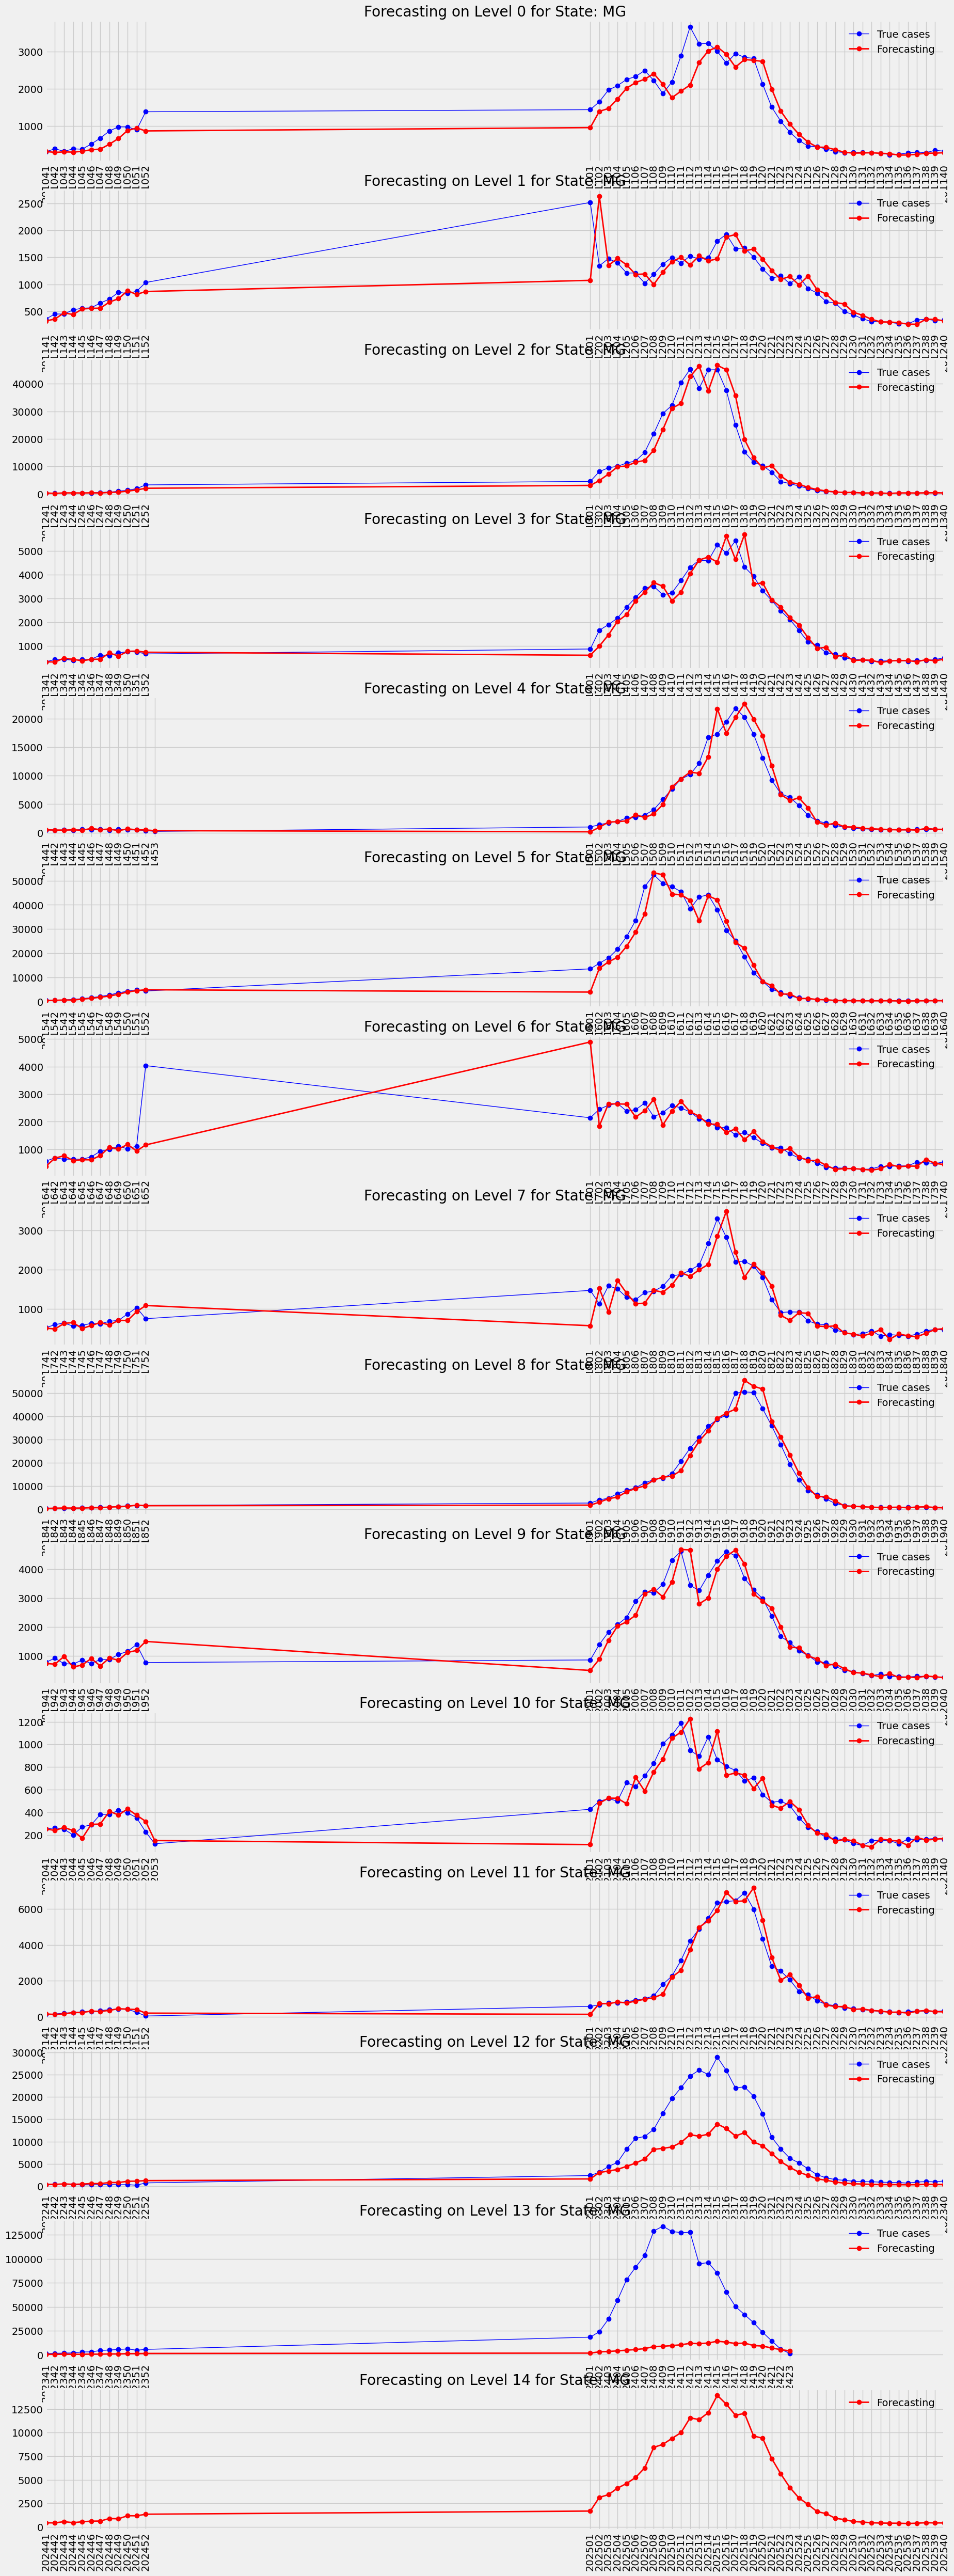

no_of_levels : 15
n_steps: 1
X shape: (752, 2)
X_train shape: (752, 1, 2)
y_train shape: (752,)
X_test shape: (52, 1, 2)
y_test shape: (52,)
Total MSE on the Prediction : 26555392.638094094 when L is 1


<Figure size 1000x500 with 0 Axes>

In [ ]:
# final ensemble of hybrid CNN-LSTM model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Input
from tensorflow.keras.optimizers import Adam
from math import sqrt
from keras.layers import LSTM, Dense, Input

# need to change here for different locations
model_name= ['CNN_LSTM_ENSEMBLE_MODEL']
selected_state_name = 'MG'
no_of_levels        = 15  # Updated to include levels up to 15
dfm                 = df[['epiweek', selected_state_name]]
# Penalty on the error
L = 1

# Define the function to create training and validation splits
def training_splits(df, levels):
    splits = []
    for i in range(1, levels + 1):
        x_start = 201001
        x_end = 201000 + (26 + (i - 1) * 100)
        y_start = 201040 + (100 * (i - 1))
        y_end = y_start + 100
        x_split = df[df['epiweek'].between(x_start, x_end)]
        y_split = df[df['epiweek'].between(y_start, y_end)]
        splits.append((x_split, y_split))
    return splits

# Function to split a univariate sequence
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Create splits for the defined levels
splits = training_splits(dfm, no_of_levels)


# Initialize lists to store forecasts and training data
all_model_forecasts              = []
all_X_trains                     = []
all_prev_level_X_pred            = []
all_prev_level_true_data         = []
all_model_r2_score               = []
all_model_forecasting_r2_score   = []
# Create subplots

# Function to define and compile CNN-LSTM model
def build_cnn_lstm_model(filters, kernel_size, learning_rate, n_steps, n_features):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Conv1D(filters=filters//2, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(30))
    model.add(Dense(10))
    model.add(Dense(1))
    opt = Adam(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
    return model



fig, ax = plt.subplots(len(splits), 1, figsize=(20, 60))

if len(splits) == 1:
    ax = [ax]

# Initialize a variable to store residuals from the previous level
previous_residuals = np.zeros(25)
# Initialize mse score for each training
mse_scores  = []

# Split the training, test, and predict
# Choose a number of time steps
n_steps       = 1           # Half of window size
# Input for LSTM and CNN
n_seq         = 1
n_features    = 2

# Define ensemble parameters
ensemble_size = 4  # Number of models in the ensemble

for i, (train, val) in enumerate(splits):
    train_new_data = train[selected_state_name].to_numpy()
    val_new_data = val[selected_state_name].to_numpy()
    X, y = split_sequence(train_new_data, n_steps)
    print("Shape before reshaping:", X.shape)
    y_start = 201041 + (100 * (i))
    y_end = y_start + 99
    if i == 0:
        # For level 0, the second column is zeros
        zero_feature = np.zeros((X.shape[0], 1))
        X = np.concatenate((X, zero_feature), axis=1)
    else:
        new_index = splits[i-1][0].shape[0]-1
        print(new_index)
        X = np.concatenate((X[:, :1], previous_residuals[0:len(X[:, :1])].reshape(-1, 1)), axis=1)  # Ensure two columns
    print(i)
    print(X)
    n_features = X.shape[1]                                                                         # Adjusted to handle multiple features
    num_output_features = 1
    X_train = X
    y_train = y
    if 0<=i<12:   # I an assign up to <12 here
      X_test, y_test = split_sequence(val_new_data, n_steps)
      # add a new column in X_test for the residuals
      X_test_zero_feature = np.zeros((X_test.shape[0], 1))
      X_test = np.concatenate((X_test, X_test_zero_feature), axis=1)
      level_13_test = X_test
      print(f'X-test for level{i}')
      print(X_test)
    else:
      # Convert fake_true_data to the format similar to level_13_test
      # level_13_test = np.array([[value, 0] for value in fake_true_data])       # tried fake true data for level 14 test data
      # X_test = level_13_test      # when we i=14                               # one can try level_13 X_test
      # Extract the first column of fake_X_pred and convert to the desired format
      level_14_test_from_fake_X_pred = np.array([[value[0, 0], 0] for value in fake_X_pred])
      X_test = level_14_test_from_fake_X_pred
      # Print the result
      #print(level_13_test)
      print(f'X-test for level{i}')
      print(X_test)
    # Ensure X_train and X_test have the correct shape
    X_train = X_train.reshape((X_train.shape[0], n_steps, n_features))
    X_test = X_test.reshape((X_test.shape[0], n_steps, n_features))

    # Store X_train for current level

    # Ensemble predictions
    ensemble_predictions = []
    # Loop through ensemble models for the number of ensemble_size
    for j in range(ensemble_size):
        filters = np.random.choice([64, 128, 256])
        kernel_size = 1  # Ensure kernel_size <= n_steps
        learning_rate = np.random.choice([0.001, 0.0001])

        # Build and train the model
        model = build_cnn_lstm_model(filters, kernel_size, learning_rate, n_steps, n_features)
        model.fit(X_train, y_train, epochs=100, validation_split=0.1, batch_size=5, verbose=0)

        # Make predictions and store
        yhat = model.predict(X_test, verbose=0)
        ensemble_predictions.append(yhat)

    # Average ensemble predictions
    ensemble_predictions = np.mean(ensemble_predictions, axis=0)

    # Calculate RMSE and R2 score
    # rmse = sqrt(mean_squared_error(y_test, ensemble_predictions))
    # r2 = r2_score(y_test, ensemble_predictions)
    # print(f'Level {i}: RMSE={rmse}, R2={r2}')


    # Evaluate the best model
    if 0<=i<14:
      y_test_regular = y_test
    else:
      # Convert fake_true_data to the for level 14
      level_14_true_data = np.array([value for value in fake_true_data])
      level_14_true_data = np.array(level_14_true_data)
      y_test_regular = level_14_true_data
    #yhat_regular_cnn = best_model.predict(X_test, verbose=0)
    yhat_regular_cnn                 = ensemble_predictions
    if len(y_test_regular) == len(yhat_regular_cnn):
      print('Best Test RMSE:', sqrt(mean_squared_error(y_test_regular, yhat_regular_cnn)))
      print('Best Test R2 Score:', r2_score(y_test_regular, yhat_regular_cnn))
      colect_r2_score = r2_score(y_test_regular, yhat_regular_cnn)
    else:
      yhat_regular_cnn = yhat_regular_cnn[:-1]
      print('Best Test RMSE:', sqrt(mean_squared_error(y_test_regular, yhat_regular_cnn)))
      print('Best Test R2 Score:', r2_score(y_test_regular, yhat_regular_cnn))
      colect_r2_score = r2_score(y_test_regular, yhat_regular_cnn)

    all_model_r2_score.append(colect_r2_score)

    if 0<=i <12:
      pred_epiweeks = dfm[dfm['epiweek'].between(y_start, y_end)]['epiweek']
      true_data = dfm[dfm['epiweek'].between(y_start, y_end)][selected_state_name]
      X_pred         = X_test
    elif i==12:
      pred_epiweeks  =  list(range(202241, 202253)) + list(range(202301, 202341))
      true_data      = fake_true_data
      #X_pred         = X_test      # this is the actual in main code
      X_pred        = fake_X_pred   # we need to check here
    elif i==13:
      pred_epiweeks  =  list(range(202341, 202353)) + list(range(202401, 202441))
      true_data      = fake_true_data
      #X_pred         = X_test      # this is the actual in main code
      X_pred        = fake_X_pred   # we need to check here
    else:
      pred_epiweeks =  list(range(202441, 202453)) + list(range(202501, 202541))
      true_data     = fake_true_data
      X_pred        = fake_X_pred

    if 0<=i<12:
      print(f'true_data len {len(true_data)}  with i : {i}')
      print(true_data.values)
      print(f'X_pred len {len(true_data)}  with i : {i}')
      print(X_pred)

      # Making predictions
      #model_forecast = best_model.predict(X_pred, verbose=0)
      ensemble_predictions = []
      # Loop through ensemble models
      for j in range(ensemble_size):
          filters = np.random.choice([64, 128, 256])
          kernel_size = 1  # Ensure kernel_size <= n_steps
          learning_rate = np.random.choice([0.001, 0.0001])

          # Build and train the model
          model = build_cnn_lstm_model(filters, kernel_size, learning_rate, n_steps, n_features)
          model.fit(X_train, y_train, epochs=100, validation_split=0.1, batch_size=5, verbose=0)

          # Make predictions and store
          #yhat = model.predict(X_test, verbose=0) # using X_test gives better prediction probably, so I need to check it again with X_test instead X_pred
          yhat = model.predict(X_pred, verbose=0) # using X_pred as best_model.predict(X_pred, verbose=0) used X_pred
          ensemble_predictions.append(yhat)

      # Average ensemble predictions
      ensemble_predictions = np.mean(ensemble_predictions, axis=0)
      model_forecast      = ensemble_predictions

      print(f'model_forecast len {len(model_forecast)}   with i : {i}')
      print(model_forecast)
      difference = true_data.values  - model_forecast.squeeze()    # model_forecast.squeeze() males an array as we true_data.values - model_forecast
      residuals = difference
      print(f'residuals for {i} of {len(residuals)}')
      print(residuals)
      print(f'X_pred for {i} of {len(X_pred)}')
      print(X_pred)
    else:
      print(f'true_data len {len(true_data)}  with i : {i}')
      print(true_data)
      print(f'X_pred len {len(true_data)}  with i : {i}')
      print(X_pred)
      # Making predictions
      #model_forecast = best_model.predict(X_pred, verbose=0)
      ensemble_predictions = []
      # Loop through ensemble models
      for j in range(ensemble_size):
          filters = np.random.choice([64, 128, 256])
          kernel_size = 1  # Ensure kernel_size <= n_steps
          learning_rate = np.random.choice([0.001, 0.0001])

          # Build and train the model
          model = build_cnn_lstm_model(filters, kernel_size, learning_rate, n_steps, n_features)
          model.fit(X_train, y_train, epochs=100, validation_split=0.1, batch_size=5, verbose=0)

          # Make predictions and store
          yhat = model.predict(X_pred, verbose=0)
          ensemble_predictions.append(yhat)

      # Average ensemble predictions
      ensemble_predictions = np.mean(ensemble_predictions, axis=0)
      model_forecast       = ensemble_predictions

      print(f'model_forecast len {len(model_forecast)}   with i : {i}')
      print(model_forecast)
      difference = true_data  - model_forecast.squeeze()    # model_forecast.squeeze() males an array as we true_data.values - model_forecast
      residuals = difference
      print(f'residuals for {i} of {len(residuals)}')
      print(residuals)
      print(f'X_pred for {i} of {len(X_pred)}')
      print(X_pred)
    if 0<=i<12:
      X_pred         = X_test
      # Ensure that the shape of residuals matches the second column of X_pred
      if i in [4, 10]:
        for l in range(len(X_pred)-1):
            print(f'len(X_pred) is {len(X_pred)} for {i}')
            X_pred[l+1, :, 1] = residuals[l]
      else:
        for l in range(len(X_pred)-1):
            X_pred[l+1, :, 1] = residuals[l]
      # Print the modified X_pred to verify
      print(f'Print the modified X_pred to verify for {i} of {len(X_pred)}')
      print(X_pred)

      #model_forecast = best_model.predict(X_pred, verbose=0)
      ensemble_predictions = []
      # Loop through ensemble models
      for j in range(ensemble_size):
          filters = np.random.choice([64, 128, 256])
          kernel_size = 1  # Ensure kernel_size <= n_steps
          learning_rate = np.random.choice([0.001, 0.0001])

          # Build and train the model
          model = build_cnn_lstm_model(filters, kernel_size, learning_rate, n_steps, n_features)
          model.fit(X_train, y_train, epochs=100, validation_split=0.1, batch_size=5, verbose=0)

          # Make predictions and store
          yhat = model.predict(X_pred, verbose=0)
          ensemble_predictions.append(yhat)

      # Average ensemble predictions
      ensemble_predictions = np.mean(ensemble_predictions, axis=0)
      model_forecast       = ensemble_predictions

      print(f'new model_forecast len {len(model_forecast)}   with residual in X_pred i : {i}')
      print(model_forecast)
      print(f'residuals for {i} of {len(residuals)}')
      print(residuals)
      print(f'X_train {i} of {len(X_train)}')
      print(X_train)
      # Add model_forecast to list
      all_prev_level_X_pred.append(X_pred)
      # print(f'length of all_prev_level_X_pred data {len(all_prev_level_X_pred)} for {i}')
      # print(all_prev_level_X_pred)
      all_prev_level_true_data.append(true_data)
      if i==11:
        # mean calculation for the using the test data from the level 0 to 11 that will be used in level 12 : test 1
        new_mean_values = []
        # Determine the maximum length of arrays in all_prev_level_X_pred
        max_length = max(len(pred) for pred in all_prev_level_X_pred)
        for l in range(max_length):
            # Collect corresponding elements from all arrays (where available)
            same_position_elements = [pred[l] for pred in all_prev_level_X_pred if len(pred) > l]
            # Calculate the mean of those elements
            new_mean_values.append(np.mean(same_position_elements, axis=0))
        # Convert mean_values to a NumPy array
        fake_X_pred    = np.array(new_mean_values)

        # this has added on Aug 14 on 6:17 pm to compute the fake_true_data
        # mean calculation for the using the test data from the level 0 to 11 that will be used in level 12 : test 1
        true_data_mean_values = []
        max_length = max(len(pred) for pred in all_prev_level_true_data)

        for l in range(max_length):
            # try:
            #     print(f"Processing position {l}...")
          # Convert to NumPy arrays if necessary
          same_position_elements = [np.array(pred)[l] if not isinstance(pred, np.ndarray) else pred[l]
                                    for pred in all_prev_level_true_data if len(pred) > l]
          # Calculate the mean of those elements
          mean_value = np.mean(same_position_elements, axis=0)
          true_data_mean_values.append(mean_value)
        # this has updated in level 11 that will be useful in label 12
        fake_true_data = true_data_mean_values

    else:
      # mean calculation for the X_pred:
      mean_values = []
      # Determine the maximum length of arrays in all_prev_level_X_pred
      max_length = max(len(pred) for pred in all_prev_level_X_pred)
      for l in range(max_length):
          # Collect corresponding elements from all arrays (where available)
          same_position_elements = [pred[l] for pred in all_prev_level_X_pred if len(pred) > l]
          # Calculate the mean of those elements
          mean_values.append(np.mean(same_position_elements, axis=0))

      # Convert mean_values to a NumPy array
      fake_X_pred    = np.array(mean_values)
      if len(fake_X_pred) ==52:
        X_pred         = fake_X_pred
      else:
        fake_X_pred    = fake_X_pred[:-1]
        X_pred         = fake_X_pred
      # Ensure that the shape of residuals matches the second column of X_pred
      for l in range(len(X_pred)-1):
        X_pred[l+1, :, 1] = residuals[l]

      # Print the modified X_pred to verify
      print(X_pred)
      all_prev_level_X_pred.append(X_pred)                                      # still we are colecting for the next level
      print(f'length of all_prev_level_X_pred data {len(all_prev_level_X_pred)} for {i}')
      print(all_prev_level_X_pred)
      #model_forecast = best_model.predict(fake_X_pred, verbose=0)
      ensemble_predictions = []
      # Loop through ensemble models
      for j in range(ensemble_size):
          filters = np.random.choice([64, 128, 256])
          kernel_size = 1  # Ensure kernel_size <= n_steps
          learning_rate = np.random.choice([0.001, 0.0001])

          # Build and train the model
          model = build_cnn_lstm_model(filters, kernel_size, learning_rate, n_steps, n_features)
          model.fit(X_train, y_train, epochs=100, validation_split=0.1, batch_size=5, verbose=0)

          # Make predictions and store
          yhat = model.predict(fake_X_pred, verbose=0)
          ensemble_predictions.append(yhat)

      # Average ensemble predictions
      ensemble_predictions = np.mean(ensemble_predictions, axis=0)
      model_forecast      = ensemble_predictions

      true_data_mean_values = []
      max_length = max(len(pred) for pred in all_prev_level_true_data)

      for l in range(max_length):
          # try:
          #     print(f"Processing position {l}...")
        # Convert to NumPy arrays if necessary
        same_position_elements = [np.array(pred)[l] if not isinstance(pred, np.ndarray) else pred[l]
                                  for pred in all_prev_level_true_data if len(pred) > l]

        # Calculate the mean of those elements
        mean_value = np.mean(same_position_elements, axis=0)
        true_data_mean_values.append(mean_value)

      fake_true_data = true_data_mean_values
      if len(fake_true_data) ==52:
        fake_true_data = fake_true_data
        for l in range(len(X_pred)):
          X_pred[l+1, :, 1] = residuals[l]
      else:
        fake_true_data = fake_true_data[:-1]
        for l in range(len(X_pred)-1):
          X_pred[l+1, :, 1] = residuals[l]

      # Convert true_data_mean_values to a NumPy array
      print(f'fake_true_data and its length is {len(fake_true_data)} with level {i}')
      print(fake_true_data)

    # Add model_forecast to list
    all_model_forecasts.append(model_forecast)
    # forecasting_r_2_score = r2_score(true_data, model_forecast)
    # all_model_forecasting_r2_score.append(forecasting_r_2_score)

    # Store X_train for current level
    all_X_trains.append(X_train.reshape(X_train.shape[0], -1))  # Flatten for saving

    if 0<=i<12:
      print(f'true_data len {len(true_data)}  with i : {i}')
      print(true_data.values)
      # Making predictions
      print(f'model_forecast len {len(model_forecast)}   with i : {i}')
      print(model_forecast)
      difference = true_data.values  - model_forecast.squeeze()    # model_forecast.squeeze() males an array as we true_data.values - model_forecast
      residuals = difference
      residuals = true_data.values - model_forecast.squeeze()  # Convert true_data to numpy array
      residuals = L * residuals
      # debugging
      print(f'residuals for {i} of {len(residuals)}')
      print(residuals)
    else:  # if 12<=i<=13:
      print(f'fake_true_data {len(fake_true_data)}  with i : {i}')
      print(fake_true_data)
      print(f'model_forecast len {len(model_forecast)}   with i : {i}')
      print(model_forecast)
      residuals = fake_true_data - model_forecast.squeeze()  # Convert true_data to numpy array.         true_data.values
      residuals = L * residuals
      # debugging
      print(f'residuals for {i} of {len(residuals)}')
      print(residuals)

    if i == 0:
        previous_residuals = np.concatenate((np.zeros(40), residuals))
    elif 0 < i < 14:
        previous_residuals = np.concatenate((previous_residuals, residuals))
    else:
        previous_residuals = np.concatenate((previous_residuals, residuals))

    # if 0 <= i < 14:
    #     previous_residuals = np.concatenate((previous_residuals.reshape(-1, 1), residuals.reshape(-1, 1)), axis=0).flatten()
    # else:
    #     previous_residuals = np.concatenate((previous_residuals.reshape(-1, 1), residuals.reshape(-1, 1)), axis=0).flatten()


    # debugging
    print(f'previous_residuals for {i} of {len(previous_residuals)}')
    print(previous_residuals)

    # this is all about the plot
    # np.linspace(1, len(pred_epiweeks),len(pred_epiweeks))
    if 0<=i<12:
      # ax[i].plot(pred_epiweeks, true_data.values, marker='o', linestyle='-', color='blue', linewidth=1, label='True cases')
      # ax[i].plot(pred_epiweeks, model_forecast.squeeze(), marker='o', linestyle='-', color='red', linewidth=2, label='Forecasting')
      ax[i].plot(pred_epiweeks, true_data.values, marker='o', linestyle='-', color='blue', linewidth=1, label='True cases')
      ax[i].plot(pred_epiweeks, model_forecast.squeeze(), marker='o', linestyle='-', color='red', linewidth=2, label='Forecasting')
      # Set x-axis limits and labels
      tick_start = y_start
      tick_end = y_end
      # Adjust the new tick position
      new_tick_positions = np.array(dfm[dfm['epiweek'].between(y_start, y_end)]['epiweek'])
      tick_labels = [f'{int(week):04d}' for week in new_tick_positions]
      ax[i].set_xticks(new_tick_positions)
      ax[i].set_xticklabels(tick_labels, rotation=90)
      ax[i].set_xlim([tick_start, tick_end])
      ax[i].legend(frameon=False)
      ax[i].set_title(f'Forecasting on Level {i} for State: {selected_state_name}')
      print(f'Level {i + 1} - Tick Start: {tick_start}, Tick End: {tick_end}, Positions: {new_tick_positions}')

      # Calculate MSE for the current level
      if len(true_data) == len(model_forecast):
        mse = mean_squared_error(true_data, model_forecast)
      else:
        true_data = true_data[:-1]
        mse = mean_squared_error(true_data, model_forecast)

      mse_scores.append(mse)
      print(f'Mean squared error : {mse} when training level is i : {i}')

    elif i==12:
      forecasting_y_start = 202241
      forecasting_y_end   = 202340
      forecasting_pred_epiweeks = dfm[dfm['epiweek'].between(forecasting_y_start, forecasting_y_end)]['epiweek']
      forecasting_true_data     = dfm[dfm['epiweek'].between(forecasting_y_start, forecasting_y_end)][selected_state_name]
      ax[i].plot(forecasting_pred_epiweeks, forecasting_true_data.values, marker='o', linestyle='-', color='blue', linewidth=1, label='True cases')
      ax[i].plot(forecasting_pred_epiweeks, model_forecast.squeeze(), marker='o', linestyle='-', color='red', linewidth=2, label='Forecasting')
      # ax[i].plot(forecasting_pred_epiweeks, forecasting_true_data, marker='o', linestyle='-', color='blue', linewidth=1, label='True cases')
      # ax[i].plot(forecasting_pred_epiweeks, model_forecast, marker='o', linestyle='-', color='red', linewidth=2, label='Forecasting')
      # Set x-axis limits and labels
      tick_start = forecasting_y_start
      tick_end = forecasting_y_end
      # Adjust the new tick position
      new_tick_positions = np.array(dfm[dfm['epiweek'].between(y_start, y_end)]['epiweek'])
      tick_labels = [f'{int(week):04d}' for week in new_tick_positions]
      ax[i].set_xticks(new_tick_positions)
      ax[i].set_xticklabels(tick_labels, rotation=90)
      ax[i].set_xlim([tick_start, tick_end])
      ax[i].legend(frameon=False)
      ax[i].set_title(f'Forecasting on Level {i} for State: {selected_state_name}')
      print(f'Level {i + 1} - Tick Start: {tick_start}, Tick End: {tick_end}, Positions: {new_tick_positions}')

      # Calculate MSE for the current level
      if len(true_data) == len(model_forecast):
        mse = mean_squared_error(true_data, model_forecast)
      else:
        true_data = true_data[:-1]
        mse = mean_squared_error(true_data, model_forecast)

      mse_scores.append(mse)
      print(f'Mean squared error : {mse} when training level is i : {i}')

      print(f'for {i} forecasting length {len(model_forecast)} and pred length {len(forecasting_pred_epiweeks)}')
      print(model_forecast)
    elif i==13:
      forecasting_y_start = 202341
      forecasting_y_end   = 202440
      true_y_end          = 202423
      forecasting_pred_epiweeks = dfm[dfm['epiweek'].between(forecasting_y_start, forecasting_y_end)]['epiweek']
      forecasting_true_epiweeks = dfm[dfm['epiweek'].between(forecasting_y_start, true_y_end)]['epiweek']
      forecasting_true_data     = dfm[dfm['epiweek'].between(forecasting_y_start, true_y_end)][selected_state_name]
      if len(forecasting_pred_epiweeks) != len(model_forecast):
        model_forecast_short = model_forecast[:len(forecasting_pred_epiweeks)]
      ax[i].plot(forecasting_true_epiweeks, forecasting_true_data, marker='o', linestyle='-', color='blue', linewidth=1, label='True cases')
      ax[i].plot(forecasting_pred_epiweeks[:len(model_forecast_short)], model_forecast_short, marker='o', linestyle='-', color='red', linewidth=2, label='Forecasting')
      #ax[i].plot(forecasting_pred_epiweeks, model_forecast, marker='o', linestyle='-', color='red', linewidth=2, label='Forecasting')
      # Set x-axis limits and labels
      tick_start = forecasting_y_start
      tick_end = forecasting_y_end
      # Adjust the new tick position
      new_tick_positions = np.array(dfm[dfm['epiweek'].between(y_start, y_end)]['epiweek'])
      tick_labels = [f'{int(week):04d}' for week in new_tick_positions]
      ax[i].set_xticks(new_tick_positions)
      ax[i].set_xticklabels(tick_labels, rotation=90)
      ax[i].set_xlim([tick_start, tick_end])
      ax[i].legend(frameon=False)
      ax[i].set_title(f'Forecasting on Level {i} for State: {selected_state_name}')
      print(f'Level {i + 1} - Tick Start: {tick_start}, Tick End: {tick_end}, Positions: {new_tick_positions}')

      # Calculate MSE for the current level
      if len(true_data) == len(model_forecast):
        mse = mean_squared_error(true_data, model_forecast)
      else:
        true_data = true_data[:-1]
        mse = mean_squared_error(true_data, model_forecast)

      mse_scores.append(mse)
      print(f'Mean squared error : {mse} when training level is i : {i}')
      print(f'for {i} forecasting length {len(model_forecast)} and pred length {len(forecasting_pred_epiweeks)}   with i : {i}')
      print(model_forecast)
    else:
      forecasting_y_start = 202441
      forecasting_y_end   = 202540
      # forecasting_pred_epiweeks = dfm[dfm['epiweek'].between(forecasting_y_start, forecasting_y_end)]['epiweek']
      forecasting_pred_epiweeks = [202441, 202442, 202443, 202444, 202445, 202446, 202447, 202448, 202449, 202450,
        202451, 202452, 202501, 202502, 202503, 202504, 202505, 202506, 202507, 202508,
        202509, 202510, 202511, 202512, 202513, 202514, 202515, 202516, 202517, 202518,
        202519, 202520, 202521, 202522, 202523, 202524, 202525, 202526, 202527, 202528,
        202529, 202530, 202531, 202532, 202533, 202534, 202535, 202536, 202537, 202538,
        202539, 202540]
      # Plot the forecasting data if the lengths match
      #if len(forecasting_pred_epiweeks) == len(model_forecast):
      ax[i].plot(forecasting_pred_epiweeks, model_forecast, marker='o', linestyle='-', color='red', linewidth=2, label='Forecasting')
      #else
       ## print(f'forecasting_pred_epiweeks shape: {forecasting_pred_epiweeks.shape}')
          # print(f'model_forecast shape: {model_forecast.shape}')
      # Set x-axis limits and labels
      tick_start = forecasting_y_start
      tick_end = forecasting_y_end
      # Adjust the new tick positions
      new_tick_positions = np.array(forecasting_pred_epiweeks)
      tick_labels = [f'{int(week):04d}' for week in new_tick_positions]
      ax[i].set_xticks(new_tick_positions)
      ax[i].set_xticklabels(tick_labels, rotation=90)
      ax[i].set_xlim([tick_start, tick_end])
      # Add a legend
      ax[i].legend(frameon=False)
      # Set the title
      ax[i].set_title(f'Forecasting on Level {i} for State: {selected_state_name}')
      # Print tick information for debugging
      print(f'Level {i + 1} - Tick Start: {tick_start}, Tick End: {tick_end}, Positions: {new_tick_positions}')

      # Calculate MSE for the current level
      if len(true_data) == len(model_forecast):
        mse = mean_squared_error(true_data, model_forecast)
      else:
        true_data = true_data[:-1]
        mse = mean_squared_error(true_data, model_forecast)

      mse_scores.append(mse)
      print(f'Mean squared error : {mse} when training level is i : {i}')
      print(f'for {i} forecasting length {len(model_forecast)} and pred length {len(forecasting_pred_epiweeks)}   with i : {i}')
      print(model_forecast)
      plt.show()
      # Store X_train for current level
      #all_X_trains.append(X_train.reshape(X_train.shape[0], -1))  # Flatten for saving

# total training mse scores
total_mse_scores_each_L = sum(mse_scores)

print(f'no_of_levels : {no_of_levels}')
print(f'n_steps: {n_steps}')
print(f'X shape: {X.shape}')
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'Total MSE on the Prediction : {total_mse_scores_each_L} when L is {L}')
plt.tight_layout()
plt.show()

# Save the data

In [ ]:
import os
import csv
import numpy as np
# Define the directory paths
forecast_dir = '/content/drive/MyDrive/Colab Notebook/Colab Notebook/infodengue2024/info_dengue_data_and_model'

# Create directories if they do not exist
if not os.path.exists(forecast_dir):
    os.makedirs(forecast_dir)

# selected_state_name = 'GO'
# Method 1: Flattening
all_residuals_output = X_train[:, :, 1].flatten()
new_X_train = X_train[:, :, 1]


# Define the file paths
x_train_path = os.path.join(forecast_dir, f'{selected_state_name}_{model_name}_all_X_train.csv')
all_residuals_output_path = os.path.join(forecast_dir, f'{selected_state_name}_{model_name}_all_residuals_output.csv')
forecast_path = os.path.join(forecast_dir, f'{selected_state_name}_{model_name}_all_model_forecasts.csv')
all_model_r2_score_path = os.path.join(forecast_dir, f'{selected_state_name}_{model_name}_all_model_r2_score.csv')


#save all_model_forecasts to CSV in row vector
# with open(forecast_path, 'w', newline='') as file:
#      writer = csv.writer(file)
#      for forecast in all_model_forecasts:
#          writer.writerow(forecast.flatten())


#save all_model_forecasts to CSV in column vector
max_len = max(arr.shape[0] for arr in all_model_forecasts)  # Determine the maximum length
# Pad arrays to have the same length
padded_forecasts = []
for arr in all_model_forecasts:
    if arr.shape[0] < max_len:
        # Pad with NaN or another value
        pad_width = max_len - arr.shape[0]
        padded_arr = np.pad(arr, ((0, pad_width), (0, 0)), mode='constant', constant_values=np.nan)
    else:
        padded_arr = arr
    padded_forecasts.append(padded_arr)
# Concatenate the padded arrays
forecasts_2d = np.hstack(padded_forecasts)
with open(forecast_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for forecast in forecasts_2d:
        writer.writerow(forecast.flatten())


# Save all_X_train to CSV
with open(x_train_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for x_train in all_X_trains:
        # Flatten array and save
        writer.writerow(x_train.flatten())

# Save all_X_train to CSV
with open(all_residuals_output_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for x_train in new_X_train:
        # Flatten array and save
        writer.writerow(x_train.flatten())


# Save all_model_r2_scoreto CSV
with open(all_model_r2_score_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for r2_score in all_model_r2_score:
        # Flatten array and save
        writer.writerow(r2_score.flatten())

# End Ensemble **CNN-LSTM model** corrections